# Исследование рынка видеоигр

На основе данных о продажах видеоигр до 2016 года необходимо определить факторы успешности видеоигры на рынке и определить ключевые точки взаимодействия с потребителем для планирования рекламной кампании на будущие периоды

### Получение общей информации о данных 

In [1]:
#загрузка библиотек для работы
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
g = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
display(g.head(20)) #оценим содержимое датасета

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В наборе данных представлены сведения о наименовании игры, платформе, годе выпуска, жанре игры, количестве проданных копий в Северной Америке, Европе, Японии и других регионах, оценке игры по мнению критиков и пользователей, а также возрастном цензе для игры по мнению  ESRB. 
При оценке типов данных было отмечено, что данные об оценке игры пользователями были определены как object, когда из описания параметра следует, что он должен быть числовым, то есть, следует изменить его тип в ходе предварительной обработки.. Также было отмечено, что отдельные данные были пропущены. Следует также изменить тип данных в столбцы год на целочисленный

Далее оценим распределение полученных числовых данных используя метод гистограмм.

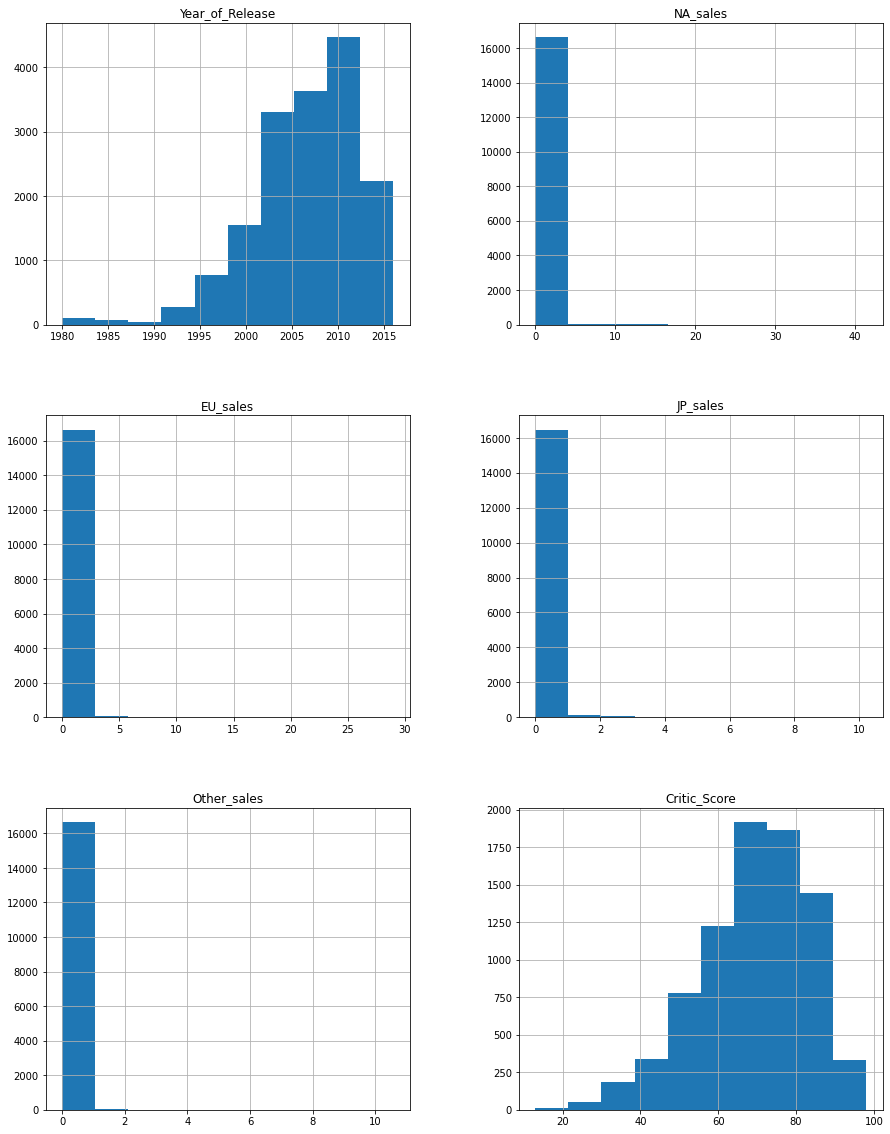

In [4]:
ax = g.hist(figsize=(15, 20))

Рассмотрим полученные гистограммы. С годами объем выпуска игр постепенно возрастает (до 2012 года), что обусловлено уровнем развития технологического прогресса, распространением игровых устройств и увеличением числа платформ, на которые можно выпускать игры. Распределение оценок критиков не вызывает вопросов, для оценки продаж по регионам необходимо провести дополнительные исследования. Также следует оценить общие объемы продаж по всем регионам для игр для формирования более полной картины. Выбросов в продажах копий игр по отдельным регионам не наблюдается - некоторые игры могли продаваться в объемах более 10 миллионов копий и следует данные о них учитывать при анализе.

### Предобработка данных

Приступим к предобработке данных. Необходимо привести все данные в нужный формат, обработать пропуски, предварительно обнаружив места их расположения, обработать дубликаты и выбросы (при их наличии). Также следует переименовать заголовки столбцов датасета для того, чтобы они соответствовали стандарту оформления.

In [5]:
g.columns = [x.lower() for x in g.columns.values] #приведем все наименования столбцов к строчным буквам

In [6]:
g.isna().sum() #оценим число пропусков в каждом из столбцов

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Есть 2 пропуска в наименовании игры и жанре игры - данные строчки следует удалить, так как их заполнение невозможно. Строчки с пропущенным годом релиза также лучше удалить, так как заполнить сведения проблематично, а удаление менее 2% строк не повредит репрезентативности выборки. Возможная причина данных пропусков - отсутствие в открытых источниках сведений о годе выпуска игры, ошибках при составлении датасета.
Пропуски в значениях с оценками критиков и пользователей игры оставим без изменений. Оценка игры является для каждого из случаев индивидуальной, оценить средний балл по жанру или иным параметрам без ущерба для конечного качества данных не представляется возможным. 
Возможные причины пропусков - низкая популярность игры, из-за чего она не была рассмотрена критиками, а также прошла мимо пользователей. 
Пропуски в столбце со значениями рейтинга игры могут быть вызваны отсутствием релиза игры в Северной Америке, где и функционирует ассоциация ESRB либо ожиданием игры оценки. З

In [7]:
#обработка пропусков в названии игры, жанре игры и дате выпуска игры
g=g.dropna(subset=['name', 'year_of_release', 'genre']).reset_index(drop=True)
g.isna().sum() #оценка качества обработки

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [8]:
#Оценка наличия явных дубликатов
g.duplicated().value_counts()

False    16444
dtype: int64

Явныхдубликатов нет. Оценим наличие неявных дубликатов в столбцах с жанром игры, наименованием игры, наименованием платформы.

In [9]:
pd.set_option('display.max_rows', None)
g['name'].value_counts().sort_values()

The Sly Collection                                                                                                                       1
The Legend of Korra (3DS)                                                                                                                1
Jirou Akagawa: Majotachi no Nemuri                                                                                                       1
Kekkon Zenya                                                                                                                             1
Summon Night Craft Sword Monogatari: Hajimari no Ishi                                                                                    1
Magical Vacation                                                                                                                         1
Binary Star                                                                                                                              1
Klonoa 2: Dream Champ Tourn

Неявных дубликатов не обнаружено; наличие повторяющихся значений в названии игр обусловлено релизами игры на разные патформы.

In [10]:
g['platform'].value_counts()

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

In [11]:
g['genre'].value_counts()

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

Неявных дубликатов обнаружено не было. Перейдем к иным столбцам.

In [12]:
g['year_of_release']=g['year_of_release'].astype('int') #изменение типа данных в столбце с годом выпуска


In [13]:
g['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

В настоящее время рейтинг K-A переименован в Е, то есть, следует заменить значения в датасете. Все остальные значения в датасете соответствуют реальности.
Стоит отметить, что игр, разрешенных с раннего детства(ЕС) не так много, можно объединить их с группой Е, различия в специфике и целевой аудитории минимальны.
АО объединим с рейтингом М - обе оценки обозначают игры только для взрослых.

In [14]:
g['rating'] = g['rating'].replace('K-A', 'E') #замена значений рейтинга на актуальное
g['rating'] = g['rating'].replace('EC', 'E') #объединение малых групп в рейтинге в одну
g['rating'] = g['rating'].replace('AO', 'M') #объединение малых групп в рейтинге в одну


In [15]:
g['rating'] = g['rating'].fillna(value = 'NS') #замена пропусков на no score 

Рассмотрим содержимое датасета по пользовательским оценкам. 

In [16]:
g['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
7.5     249
8.5     247
7.9     246
8.1     237
7.7     236
7.3     232
8.4     221
7       216
7.4     213
7.6     213
8.6     209
6.8     191
8.7     186
7.1     180
8.8     179
7.2     166
8.9     151
6.6     145
6.9     138
6.3     135
6.7     125
6       123
6.5     121
9       119
6.2     112
6.4     105
5.8      97
9.1      89
6.1      82
5.7      77
5.9      76
5.6      72
5.4      71
5.3      70
5.5      69
5        64
5.2      54
4.8      49
5.1      44
9.2      43
4.9      39
4.6      37
4.3      37
4.4      33
4.5      32
4.1      31
9.3      31
3.8      27
4        27
4.2      27
3.5      26
4.7      24
2.8      24
3.1      23
3.4      23
3        21
3.7      19
3.6      18
3.3      15
3.9      13
2.5      12
3.2      12
2.4      11
9.4      11
2        10
2.1       9
2.9       9
1.7       9
2.7       7
2.2       6
1.8       5
1.4       5
9.5       5
2.6       4
1.2       3
1.6       3
0.5       2
1         2
0.7 

tbd - это аббревиатура для сокращения to be defined, то есть, значения оценки пользователя нет на текущее время и можно заменить tbd на пропуск

In [17]:
g.loc[g['user_score'] == 'tbd', 'user_score'] = float('nan')
g['user_score'] = g['user_score'].astype('float') #замена типа значений в пользовательской оценке на целочисленное

In [18]:
#оценка суммарных объемов продаж по игре
g['sales'] = g['na_sales']+g['eu_sales']+g['jp_sales']+g['other_sales'] 

In [19]:
# check
g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  sales            16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


In [20]:
g.head(30)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NS,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NS,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NS,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NS,28.31


In [21]:
g['sales'].describe() #оценка распределения числа продаж

count    16444.000000
mean         0.536023
std          1.558786
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: sales, dtype: float64

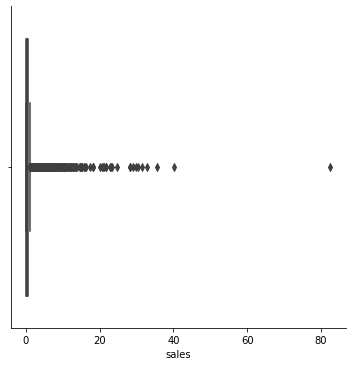

In [22]:
sns.catplot(x="sales", kind="box", data = g)

Оценим, насколько много игр имели потрясающий успех и продавались свыше 30 милионов копий. 

In [23]:
g.loc[g['sales']>30, :]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NS,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NS,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NS,30.26


Представленные игры действительно были бестселлерами и редко какой продукт может повторить успех, поэтому в данном наборе игры с такими показателями продаж скорее выброс, чем данность. Поэтому их лучше исключить из рассмотрения

In [24]:
g=g.loc[g['sales'] <= 30, :]
g.head(30)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NS,28.31
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NS,24.67
11,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E,23.21
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NS,23.09
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80


***Выводы по разделу***

Были обработаны пропуски в данных - удалены пропуски в данных о наименовании игры, жанре, годе выпуска, оставлены без изменений пропуски в оценках пользователей, критиков и рецензентов, так как данные значения невозможно сгенерировать исходя из содержимого датасета без снижения качества данных.
Также были изменены заголовки столбцов, данные приведены к соответствующему типу.


### Исследовательский анализ данных

#### Число релизов по годам
Оценим число релизов по годам с использованием графика.

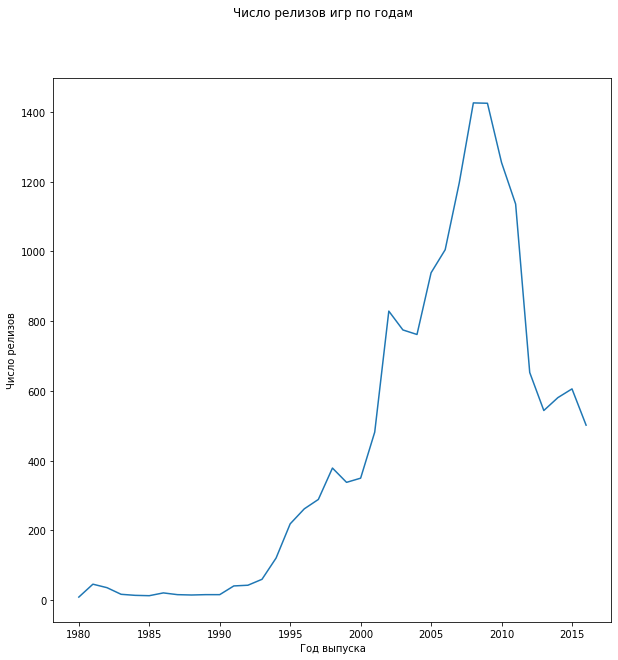

In [25]:
plt.figure(figsize=(10,10))
plt.plot(g.groupby('year_of_release')['name'].count())
plt.xlabel('Год выпуска')
plt.ylabel('Число релизов')
plt.suptitle('Число релизов игр по годам')
plt.show()

In [26]:
g.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      13
1986      21
1987      16
1988      15
1989      16
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     262
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1005
2007    1197
2008    1426
2009    1425
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

При предварительной оценке данных было уже отмечено, что до 2006 года число игр, выпускаемых ежегодно, росло. Эпохой расцвета видеоигр можно считать года 2005-2010, затем идет тренд на снижение.

При отслеживании тенденций стоит использовать данные, начиная с 2014 года, так как игровая индустрия динамично развивается, регулярно обновляются игровые платформы, выходят новые релизы. Для оценки только новых трендов следует взять данные за 2014-2016 годы.
Для целей дальнейшего исследования создадим новый датасет games, в который и войдут релизы после 2009 года

#### Срок жизни платформ на рынке

Дополнительно оценим срок жизни платформ за последние 20 лет с использованием сводной таблицы. Выбор такого временного интервала позволит охватить наибольшее число платформ и отследить их жизненный цикл

In [27]:
g20 = g[g['year_of_release']>1996]

In [28]:
#оценка числа релизов по платформам
pl = g20.pivot_table(index='platform', values='sales', columns = 'year_of_release', aggfunc = 'count')
pl

year_of_release,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.0,93.0,91.0,80.0,86.0,46.0
DC,NaN,7.0,14.0,20.0,8.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,118.0,201.0,376.0,492.0,403.0,323.0,153.0,23.0,8.0,NaN,NaN,NaN
GB,8.0,8.0,11.0,17.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBA,NaN,NaN,NaN,1.0,107.0,198.0,150.0,175.0,135.0,39.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,NaN,NaN,NaN,NaN,22.0,152.0,144.0,83.0,97.0,40.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N64,49.0,77.0,102.0,60.0,9.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PC,6.0,8.0,7.0,7.0,15.0,19.0,33.0,30.0,37.0,52.0,62.0,76.0,107.0,90.0,139.0,61.0,38.0,47.0,50.0,54.0
PS,188.0,248.0,200.0,160.0,91.0,20.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#оценка объемов продаж по платформам
pls = g20.pivot_table(index='platform', values='sales', columns = 'year_of_release', aggfunc = 'sum')
pls

year_of_release,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
DC,NaN,3.38,5.16,5.99,1.07,0.29,NaN,NaN,NaN,NaN,0.02,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.27,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
GB,6.37,26.90,38.00,19.76,9.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBA,NaN,NaN,NaN,0.07,61.53,74.16,56.67,77.91,33.86,5.28,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,NaN,NaN,NaN,NaN,26.34,51.81,50.61,28.82,27.62,11.26,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N64,39.50,49.24,57.87,33.97,3.25,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PC,11.27,3.26,4.74,4.66,5.47,8.57,8.84,10.39,4.37,2.85,9.28,12.42,16.91,24.28,35.03,23.22,12.38,13.28,8.52,5.25
PS,136.17,169.49,144.53,96.37,35.59,6.67,2.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Игры на персональные компьютеры остаются актуальными всегда, пока есть компьютеры. А срок актуальности операционных систем - это отдельная тема для изучения.
В среднем, платформа остается актуальной 8-10 лет, после чего она заменяется на более совершенную, чаще всего от того же производителя.
Стоит отметить, что после релиза новой платформы игры на ее старую версию остаются актуальными еще 3-4 года. 

#### Оценка тенденций продаж по различным платформам за 2014-2016 годы

In [30]:
games = g[g['year_of_release']>2013]

<div class="alert alert-da nger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватишь уже отжившие тренды. Но и слишком короткий период тоже брать не стоит

Оценим продажи по различным платформам. 

In [31]:
#формирование сводной таблицы по продажам на различных платформах
platform = games.pivot_table(index='platform', values='sales', columns = 'year_of_release', aggfunc = ['sum', 'count'])
platform

sum                 count              
year_of_release    2014    2015   2016   2014   2015   2016
platform                                                   
3DS               43.76   27.78  15.14   80.0   86.0   46.0
PC                13.28    8.52   5.25   47.0   50.0   54.0
PS3               47.76   16.82   3.60  108.0   73.0   38.0
PS4              100.00  118.90  69.25   75.0  137.0  164.0
PSP                0.24    0.12    NaN   10.0    3.0    NaN
PSV               11.90    6.25   4.25  100.0  110.0   85.0
Wii                3.75    1.14   0.18    6.0    4.0    1.0
WiiU              22.03   16.35   4.60   31.0   28.0   14.0
X360              34.74   11.96   1.52   63.0   35.0   13.0
XOne              54.07   60.14  26.15   61.0   80.0   87.0

Игровые устройства обновляются, часть из них уходит в прошлое и на их место приходят другие. Этот факт подвтверждается и сведениями о продажах игр на различных платформах за 20 лет и за последние 3.
Из оценки тенденций стоит отметить, что игры на компьютеры выпускаются всегда с примерно одинаковой периодичностью. Пик 2011 года связан с тем, что в 2011 году в целом было выпущено достаточно много игр. При этом, интерес пользователей к играм на РС постепенно падает, что может быть связано с тем, что операционные системы обновляются не столь часто и старые интересные игры остаются в течение 5-7 лет в тренде на компьютерах, то есть, геймеры выбирают старые релизы.
Растущими платформами являются PS4, XOne. Актуальными еще остаются PSV и 3DS, но отмечается тенденция к постепенному угасанию интереса к данному продукту у покупателей и разработчиков.
Падает интерес покупателей к X360, WiiU, PS3 (ее уже практически заместил на рынке PS4). Не стоит рассматривать игры на PS2, DS, PSP, Wii,PS3,  эти платформы уже устарели.
3DC на рынке с 2011 года, то есть, 6 лет, сейчас продажи игр на нее неплохие, но уже падают. Можно рассмотреть игры на эту платформу в качестве объекта продаж на ближайший год, на более длительный период их необходимо будет вывести из ассортимента.
Для целей анализа трендов продаж оставим в рассмотрении РС, PS4, XOne, PSV, 3DC.

In [32]:
top=['PS4', 'XOne', 'PSV', 'PC', '3DS']
top_games = games.query('platform in @top') #срез данных по актуальным платформам

In [33]:
top_games['platform'].value_counts()

PS4     376
PSV     295
XOne    228
3DS     212
PC      151
Name: platform, dtype: int64

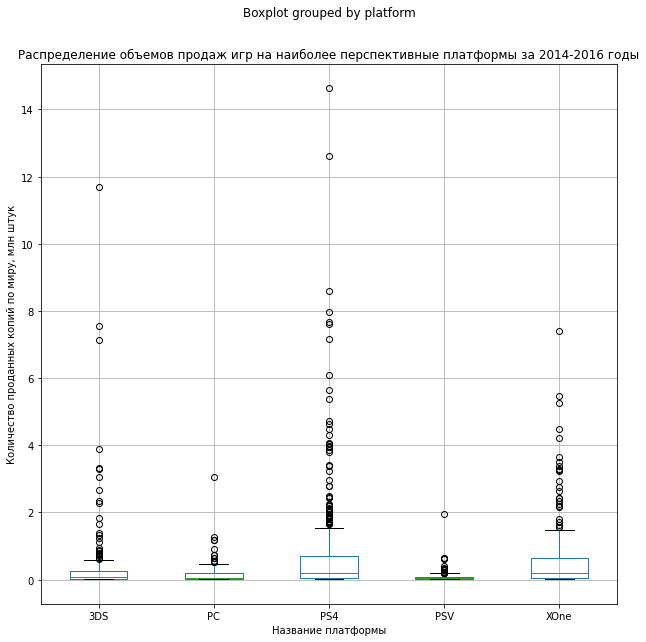

In [34]:
#оценка продаж по интересующим платформам в форме графика с усами
top_games.boxplot(column='sales', by='platform', figsize=(10,10))
plt.xlabel('Название платформы')
plt.ylabel('Количество проданных копий по миру, млн штук')
plt.title('Распределение объемов продаж игр на наиболее перспективные платформы за 2014-2016 годы')
plt.show()

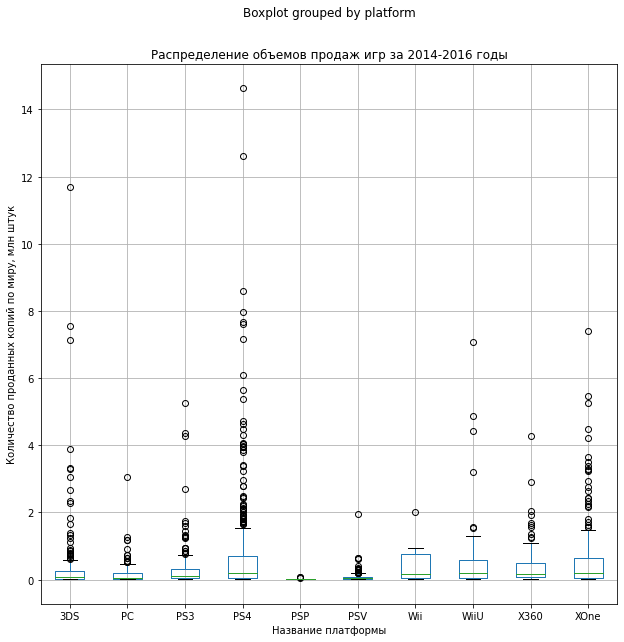

In [35]:
#оценка продаж по всем платформам за 2014-2016 годы в форме графика с усами
games.boxplot(column='sales', by='platform', figsize=(10,10))
plt.xlabel('Название платформы')
plt.ylabel('Количество проданных копий по миру, млн штук')
plt.title('Распределение объемов продаж игр за 2014-2016 годы')
plt.show()

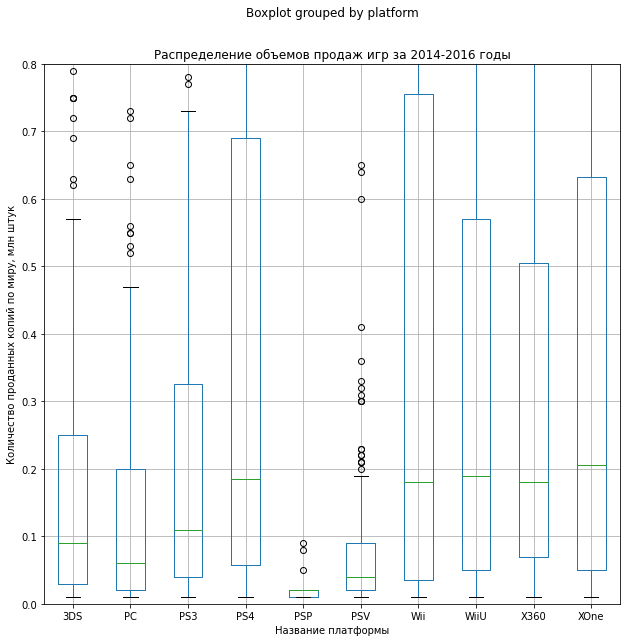

In [36]:
#оценка продаж по всем платформам за 2014-2016 годы в форме графика с усами более детально
games.boxplot(column='sales', by='platform', figsize=(10,10))
plt.xlabel('Название платформы')
plt.ylabel('Количество проданных копий по миру, млн штук')
plt.title('Распределение объемов продаж игр за 2014-2016 годы')
plt.ylim(0, 0.8)
plt.show()

Для Wii наблюдался резкий скачок продаж с постепенным снижением - возможно, на платформу выпустили интересный релиз или же создатели вложились в раскрутку продукта на старте.
Наиболее высокие медианные продажи отмечаются для PS4, Wii, WiiU, X360, XOne.
Максимальную выручку принесли игры на PS4, 3DC, есть бестселлеры и выпущенные для WiiU, XOne.

In [37]:
#оценка продаж по интересующим платформам в форме таблицы
pivot = top_games.pivot_table(index='platform', values='sales', aggfunc=['min', 'max', 'median', 'std', 'count', 'sum'])
pivot

,min,max,median,std,count,sum
,sales,sales,sales,sales,sales,sales
platform,,,,,,
3DS,0.01,11.68,0.090,1.188368,212,86.68
PC,0.01,3.05,0.060,0.329359,151,27.05
PS4,0.01,14.63,0.185,1.614969,376,288.15
PSV,0.01,1.96,0.040,0.141591,295,22.40
XOne,0.01,7.39,0.205,1.046513,228,140.36


In [38]:
#оценка продаж по всем платформам в форме таблицы
pivot_d = games.pivot_table(index='platform', values='sales', aggfunc=['min', 'max', 'median', 'std', 'count', 'sum'])
pivot_d

,min,max,median,std,count,sum
,sales,sales,sales,sales,sales,sales
platform,,,,,,
3DS,0.01,11.68,0.090,1.188368,212,86.68
PC,0.01,3.05,0.060,0.329359,151,27.05
PS3,0.01,5.27,0.110,0.633059,219,68.18
PS4,0.01,14.63,0.185,1.614969,376,288.15
PSP,0.01,0.09,0.020,0.027735,13,0.36
PSV,0.01,1.96,0.040,0.141591,295,22.40
Wii,0.01,2.01,0.180,0.625451,11,5.07
WiiU,0.01,7.09,0.190,1.161467,73,42.98


Успех PS3 можно считать своеобразным гарантом успеха PS4, так как имя бренда многое значит в индустрии электроники. Тем более, что эта платформа показала хорошую динамику числа продаж игр на нее за 2016 год. На PSV выпускается достаточно приличное число игр, но по общей сумме продаж платформа проигрывает.
XOne можно считать второй фокусной линейкой после PS.
РС - не очень популярная платформа, но самая стабильная, в отличие от иных платформ, представленных в рейтинге. И в отличии от еще более стабильной по спросу PSP игры на компьютер неплохо продаются.
3DS сейчас падае в популярности и через 2-3 года игры на нее можно выводить из ассортимента, но пока продажи игр на нее остаются на нормальном уровне, возможно рассмотрение в качестве резервного варианта.

#### Оценка зависимости объемов продаж игры от оценок критиков и пользователей

Оценим взаимосвязь популярности игр на платформе PS4 и оценок критиков и пользователей. Выбор платформы обусловлен тем, что записей об играх для нее среди растущих платформ наибольшее число, а так как поведение покупателей формируется годами, то можно предположить, что если взаимосвязь между оценками и продажами существует для PS4, то она будет наблюдаться и для более современных платформ. 

При оценке будем использовать диаграммы рассеивания, тепловые карты.

In [39]:
ps4=games.loc[games['platform']== 'PS4', ['name', 'platform', 'critic_score', 'user_score', 'sales']]

In [40]:
cor = ps4.corr()

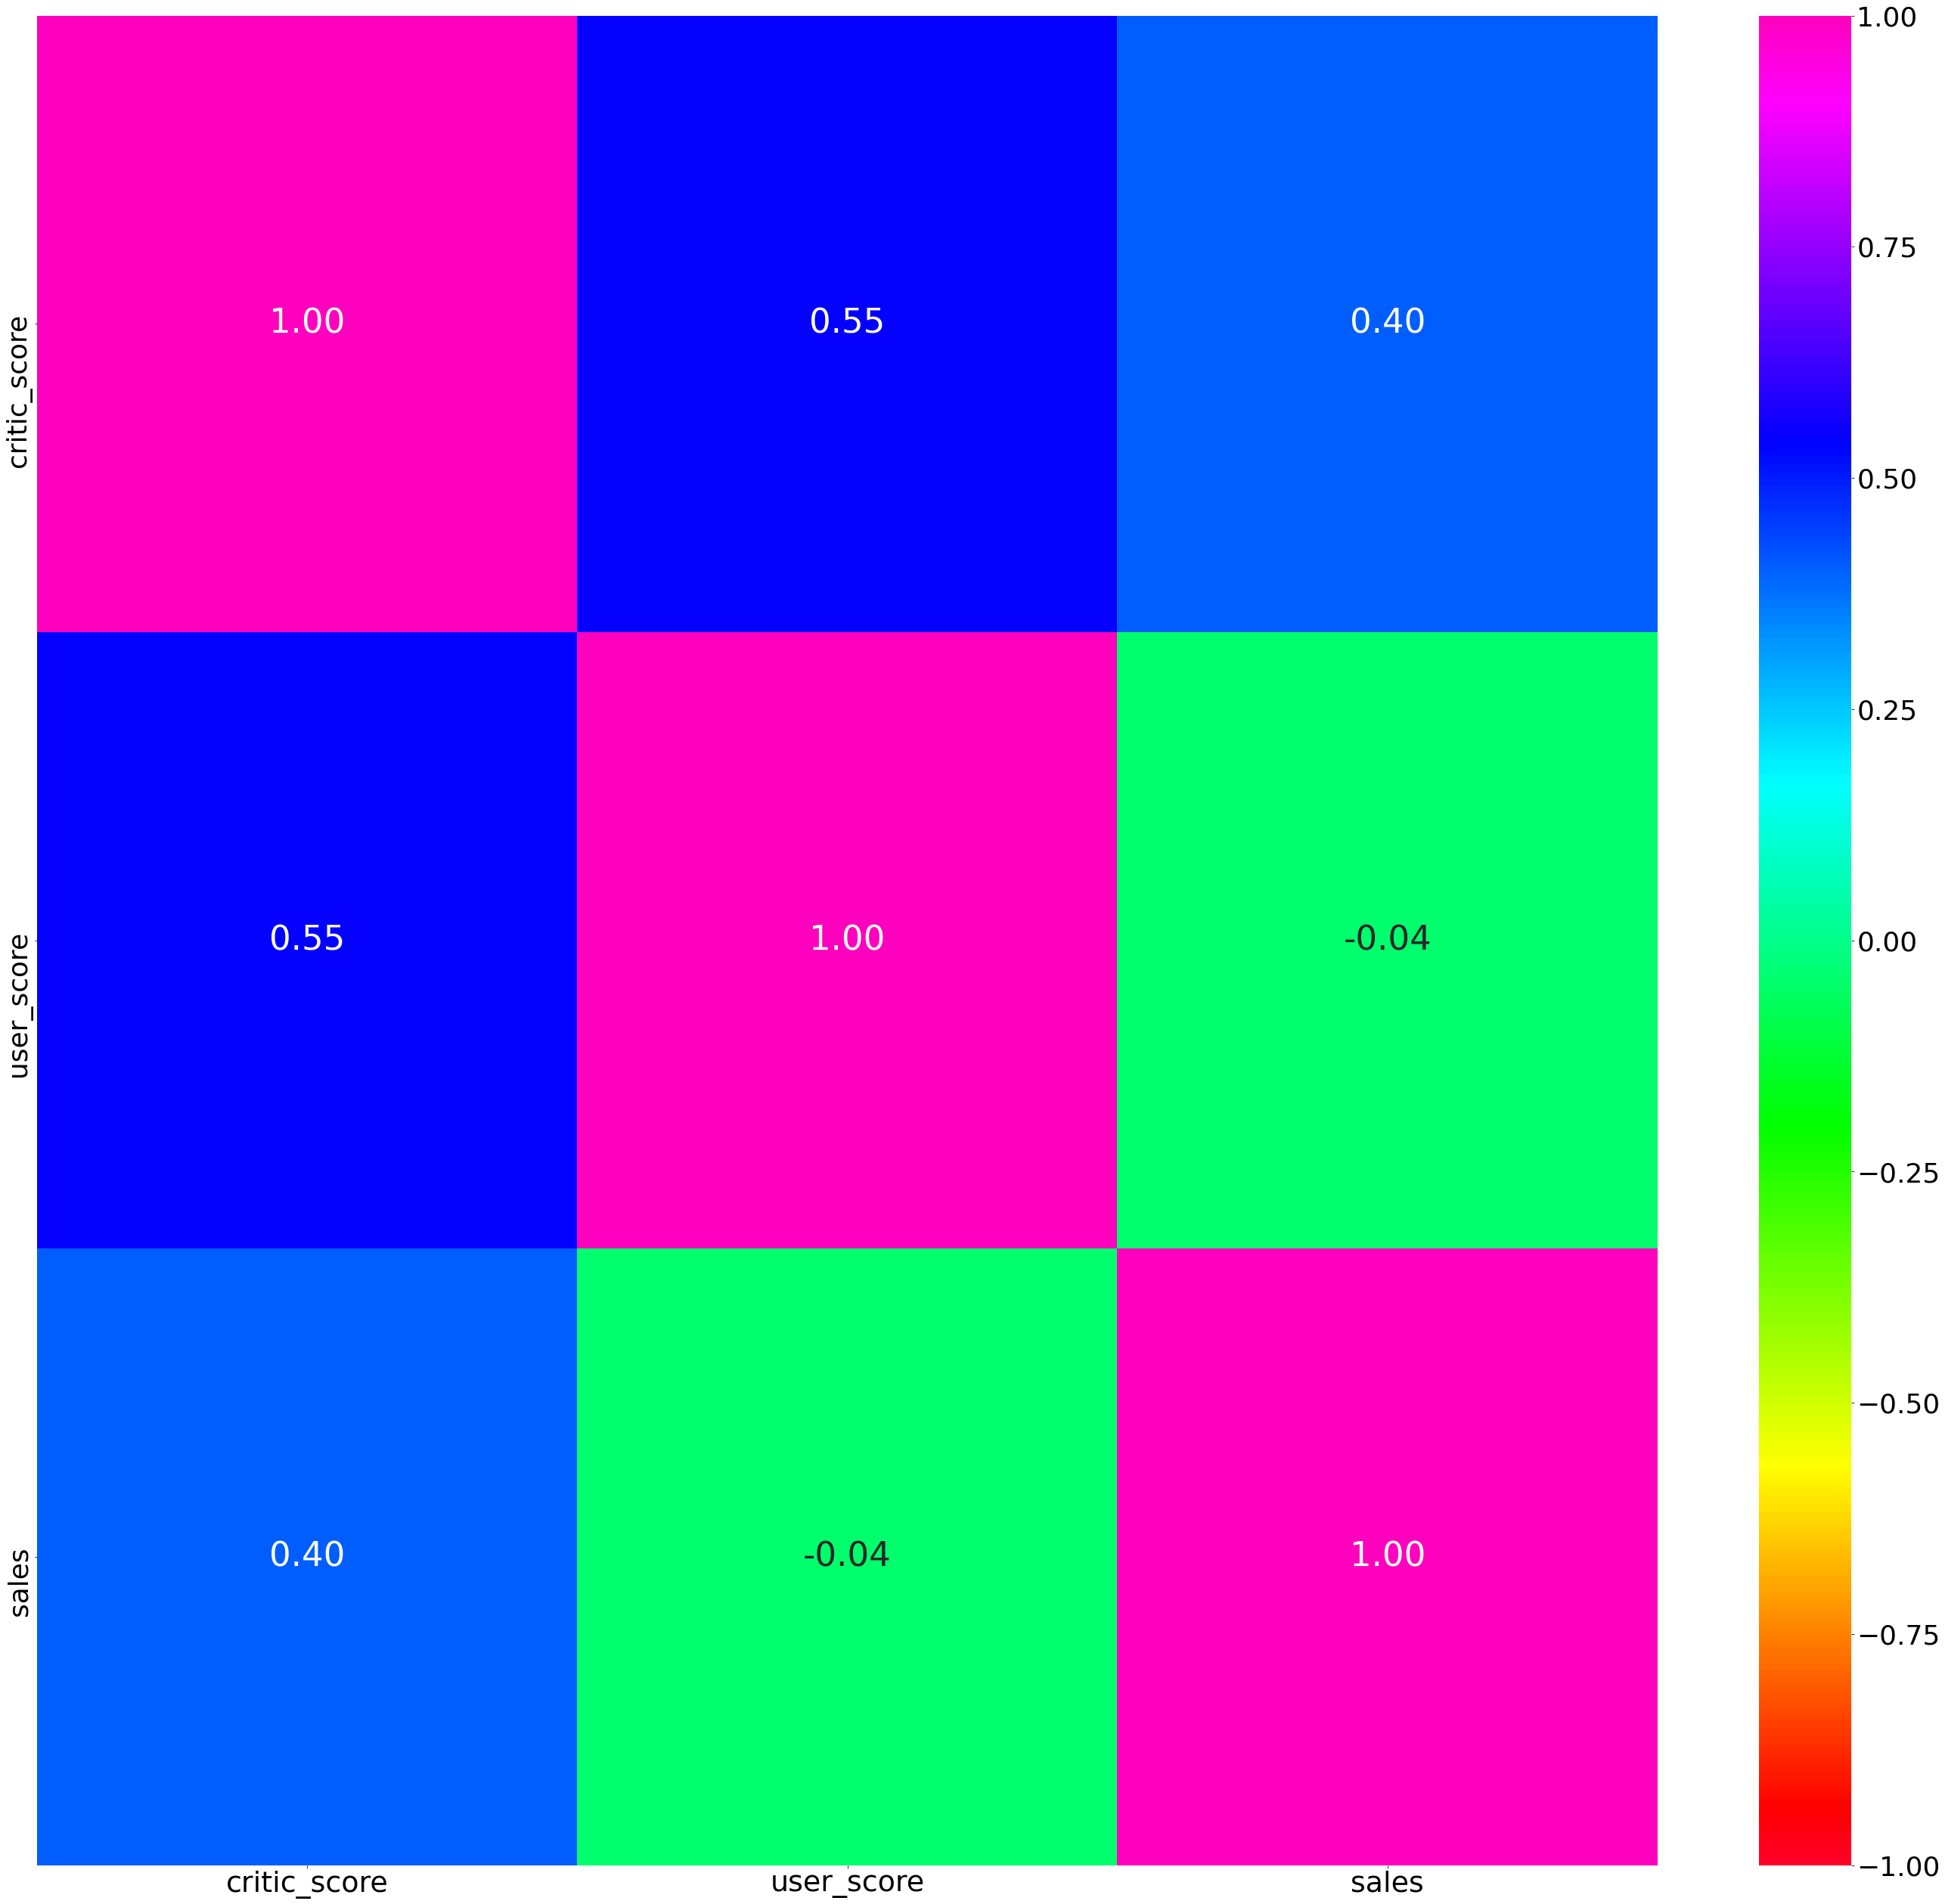

In [41]:
#вывод тепловой карты
plt.figure(figsize=(48,45))
with plt.style.context({'axes.labelsize':24,
                        'xtick.labelsize':38,
                        'ytick.labelsize':36}):
    sns.heatmap(data=cor, 
            annot=True,
            fmt=".2f", 
            vmin=-1, 
            vmax=1, 
            cmap="gist_rainbow",
            annot_kws={'size': 45})

plt.show()

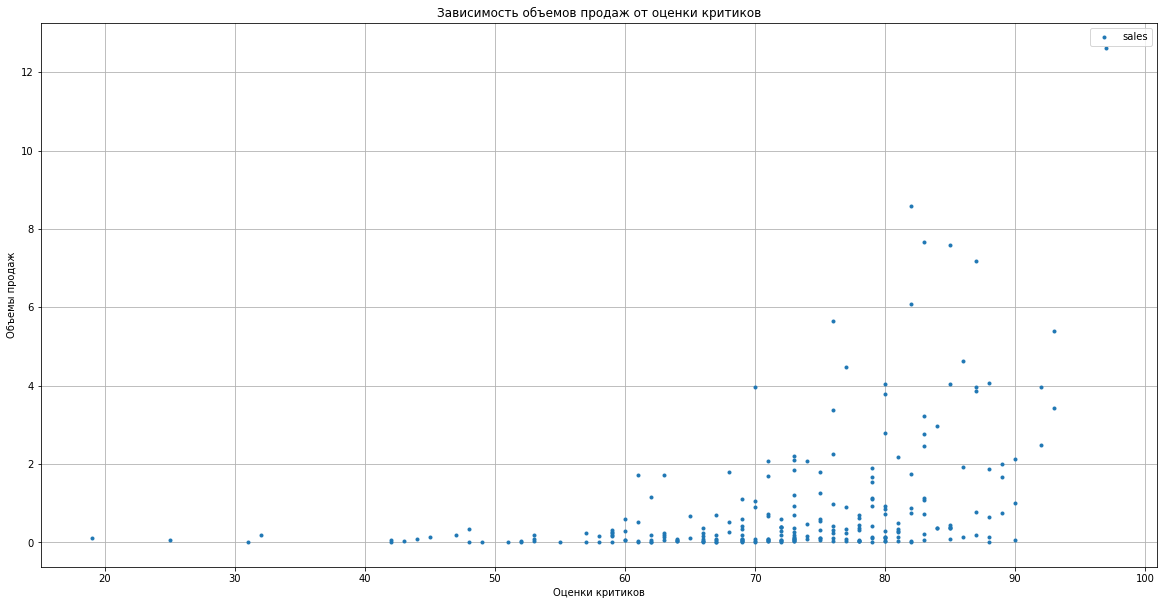

In [42]:
#оценка зависимости продаж от оценки критиков
ps4.plot(x='critic_score', y='sales',
                  style='.', title='Зависимость объемов продаж от оценки критиков',
                   grid=True, sharex=False, figsize=(20,10), xlabel = 'Оценки критиков', ylabel = 'Объемы продаж')
plt.show()

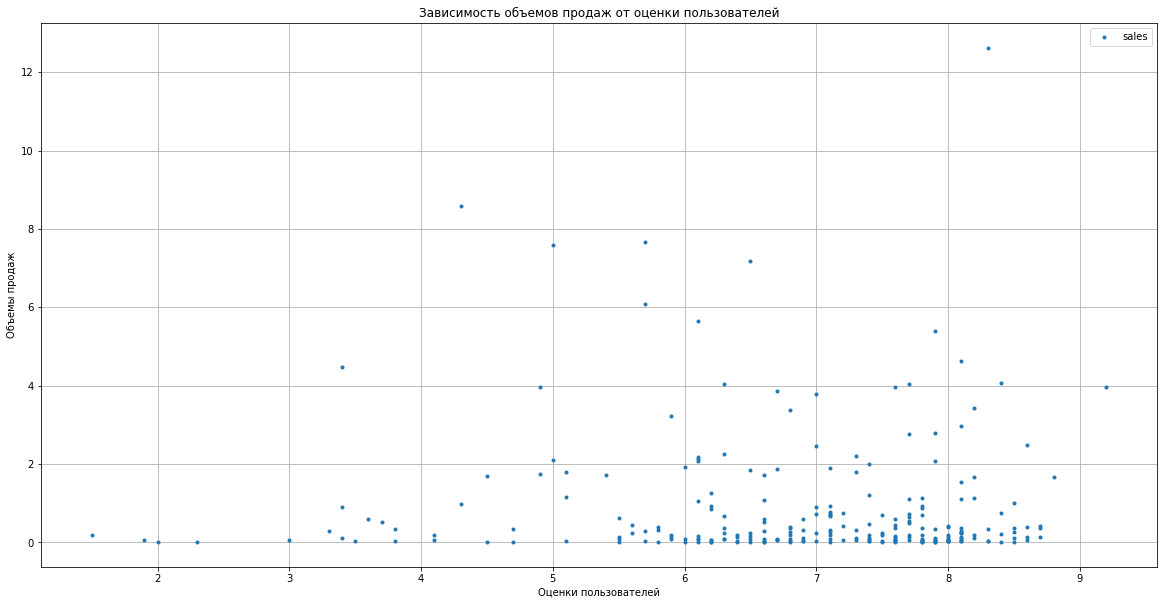

In [43]:
#оценка зависимости продаж от оценки пользователей
ps4.plot(x='user_score', y='sales',
                  style='.', title='Зависимость объемов продаж от оценки пользователей',
                   grid=True, sharex=False, figsize=(20,10), xlabel = 'Оценки пользователей', ylabel = 'Объемы продаж')
plt.show()

Как мы видим исходя из оценки корреляций между параметрами, объемы продаж были незначительно связаны с оценками критиков (коэффициент корреляции 0.40), а также покупатели практически не учитывали оценки пользователей при приобретении игры (коэффициент корреляции -0.04). Подобные результаты могут быть связаны с тем, что любители игр часто приобретают игры по предзаказу или в первые дни продаж, когда в доступе еще нет отзывов критиков или достаточного количества отзывов пользователей.
Низкая корреляция между продажами и оценками пользователей может также быть вызвана отсутствием у пользователей желания писать отзывы и ставить оценки.
Было отмечено, что коэффициент корреляции между оценками пользователей и критиков сильный - 0.55, что может свидетельствовать о единстве мнений между группами рецензентов или о том, что пользователи при формировании отзыва учитывают отзывы влиятельных критиков.

Резюмируя, можно отметить, что при рекламе игр стоит в ряде случаев обращать внимание на хорошие оценки критиков, однако это не будет являться гарантией хороших продаж.

In [44]:
ps4['sales'].describe()

count    376.000000
mean       0.766356
std        1.614969
min        0.010000
25%        0.057500
50%        0.185000
75%        0.690000
max       14.630000
Name: sales, dtype: float64

In [45]:
#Оценка наиболее популярных игр на платформе
ps4.loc[ps4['sales']>10, :]

,name,platform,critic_score,user_score,sales
31,Call of Duty: Black Ops 3,PS4,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,97.0,8.3,12.62


В случае с бестселлерами на платформе большую роль, чем оценка критиков, сыграл образ игры - все игры являются продолжениями уже культовых релизов и пользователи покупали игры во многом из-за своих впечатлений от серии в целом.

Оценим корреляцию между объемом продаж и оценками критиков на других популярных платформах.

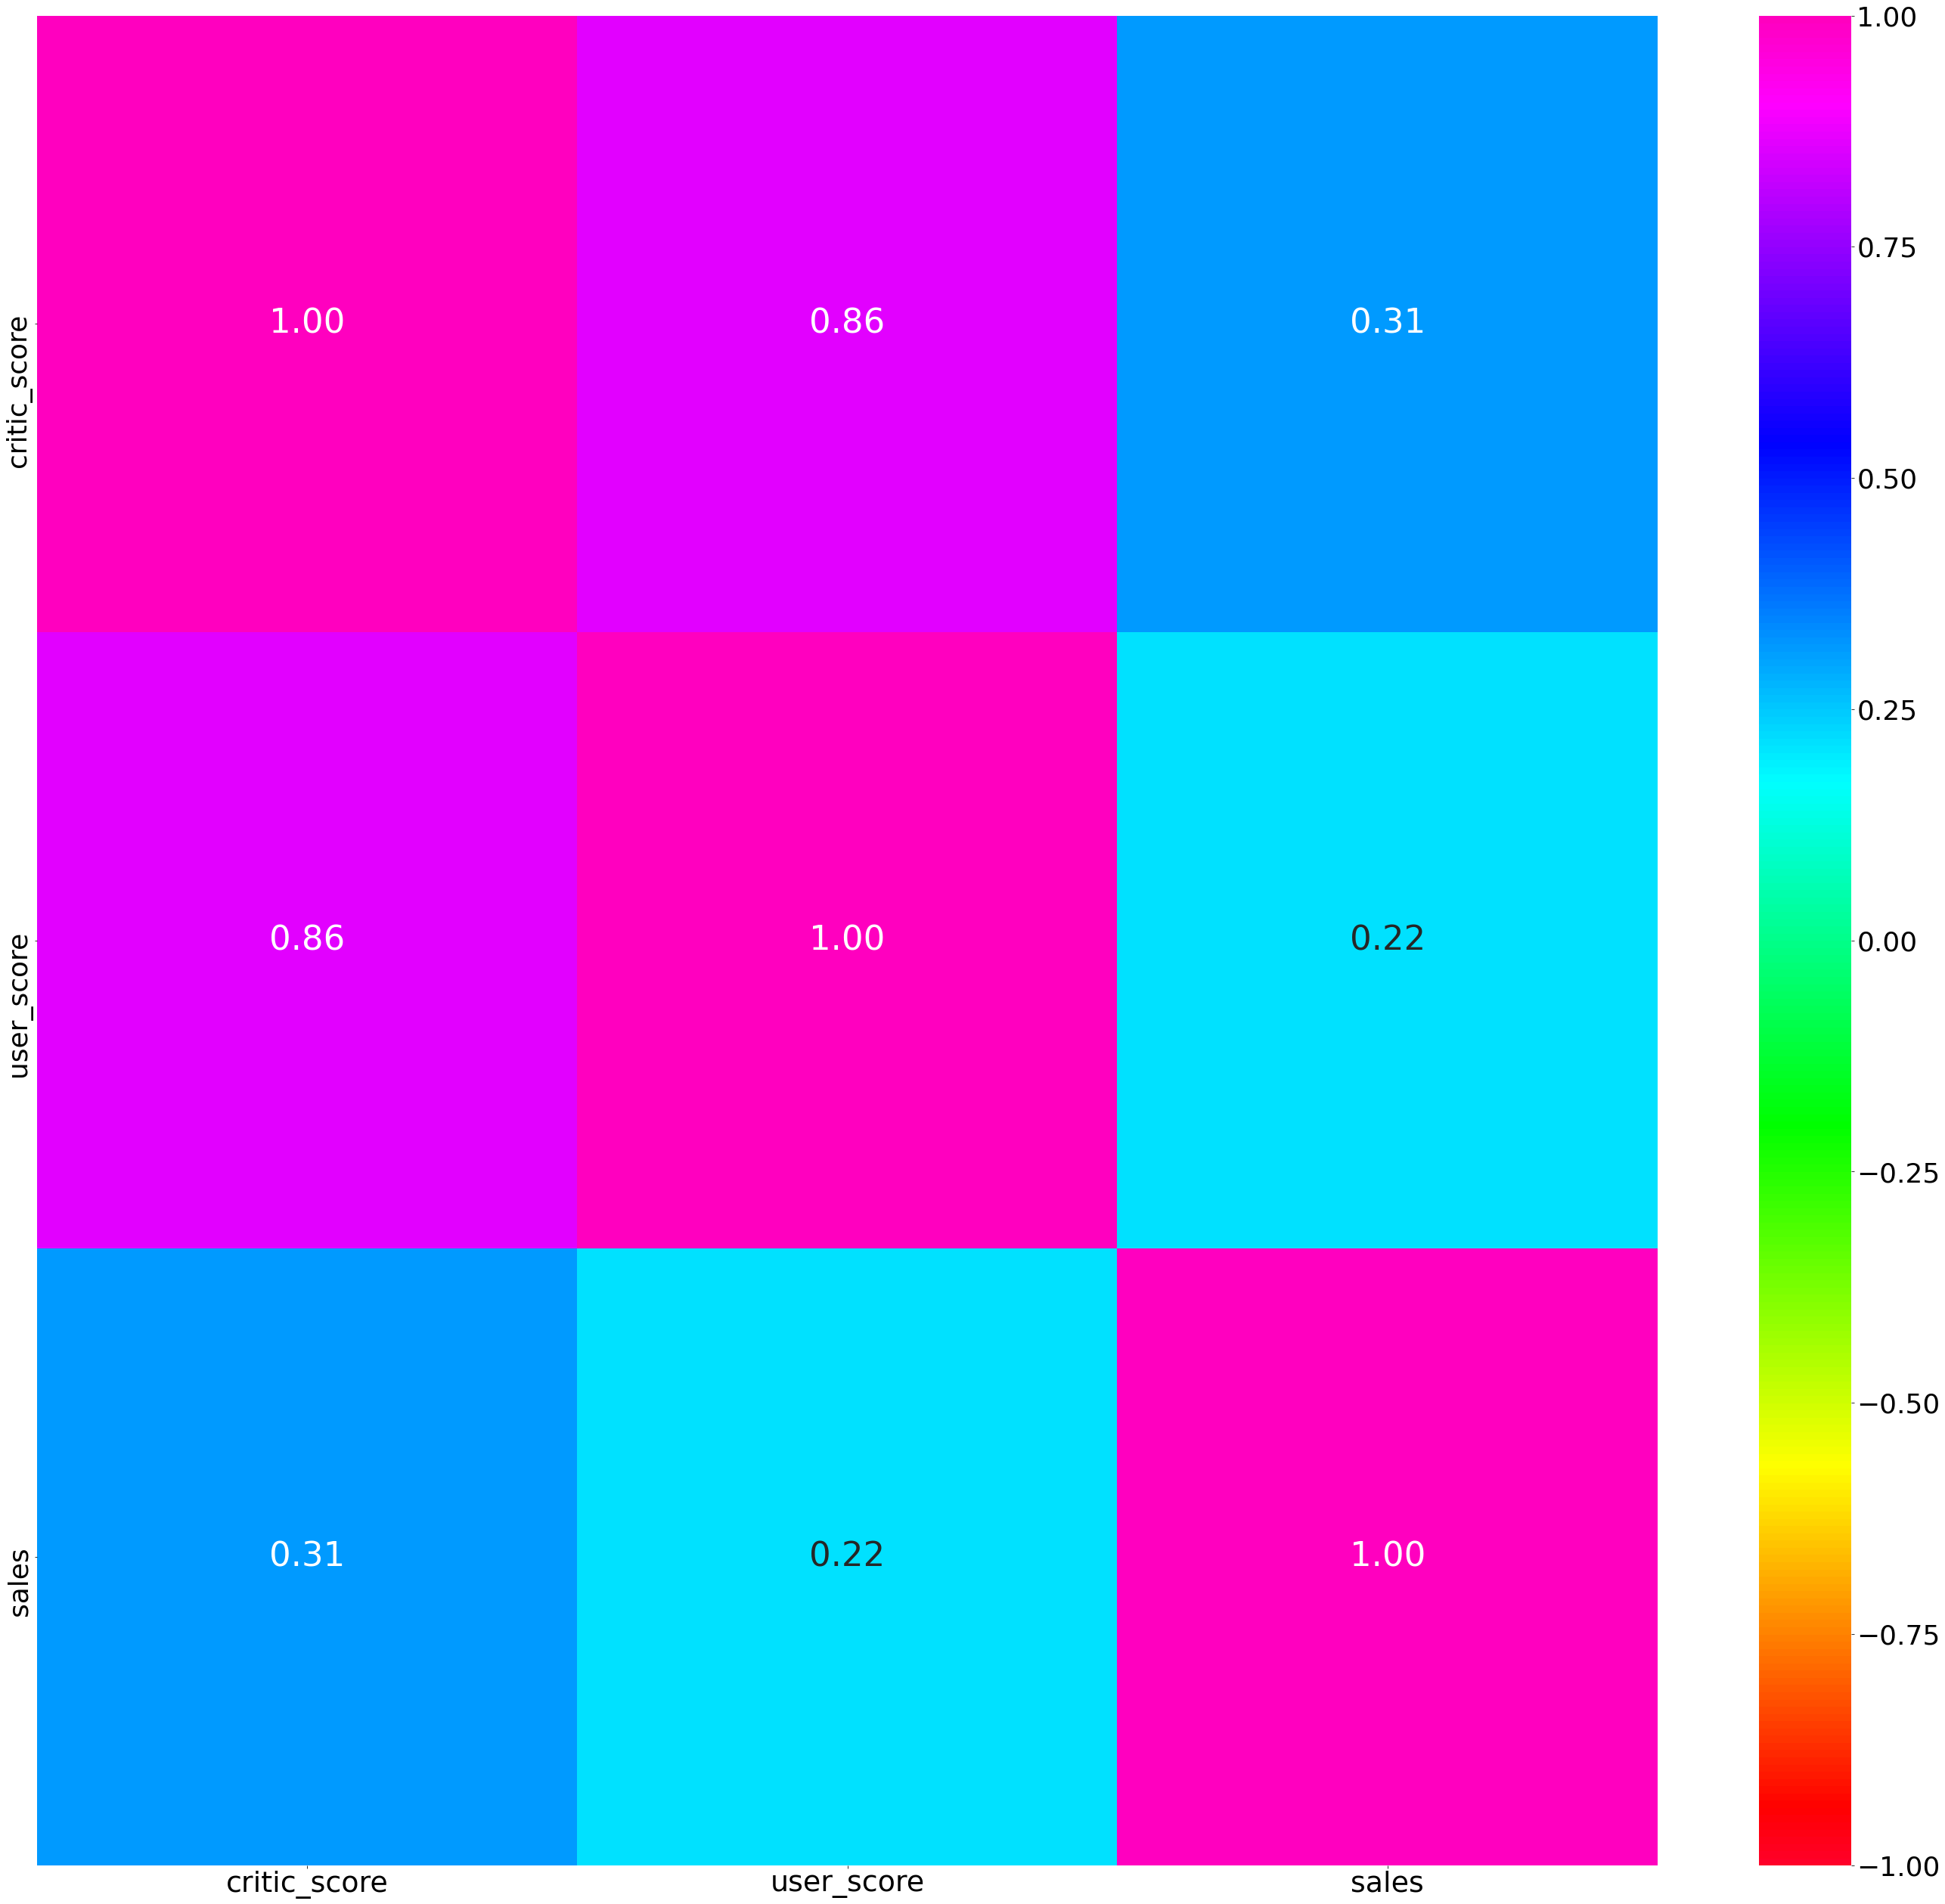

In [46]:
dc=games.loc[games['platform']== '3DS', ['name', 'platform', 'critic_score', 'user_score', 'sales']]
cor_dc = dc.corr()
#вывод тепловой карты
plt.figure(figsize=(48,45))
with plt.style.context({'axes.labelsize':24,
                        'xtick.labelsize':38,
                        'ytick.labelsize':36}):
    sns.heatmap(data=cor_dc, 
            annot=True,
            fmt=".2f", 
            vmin=-1, 
            vmax=1, 
            cmap="gist_rainbow",
            annot_kws={'size': 45})

plt.show()

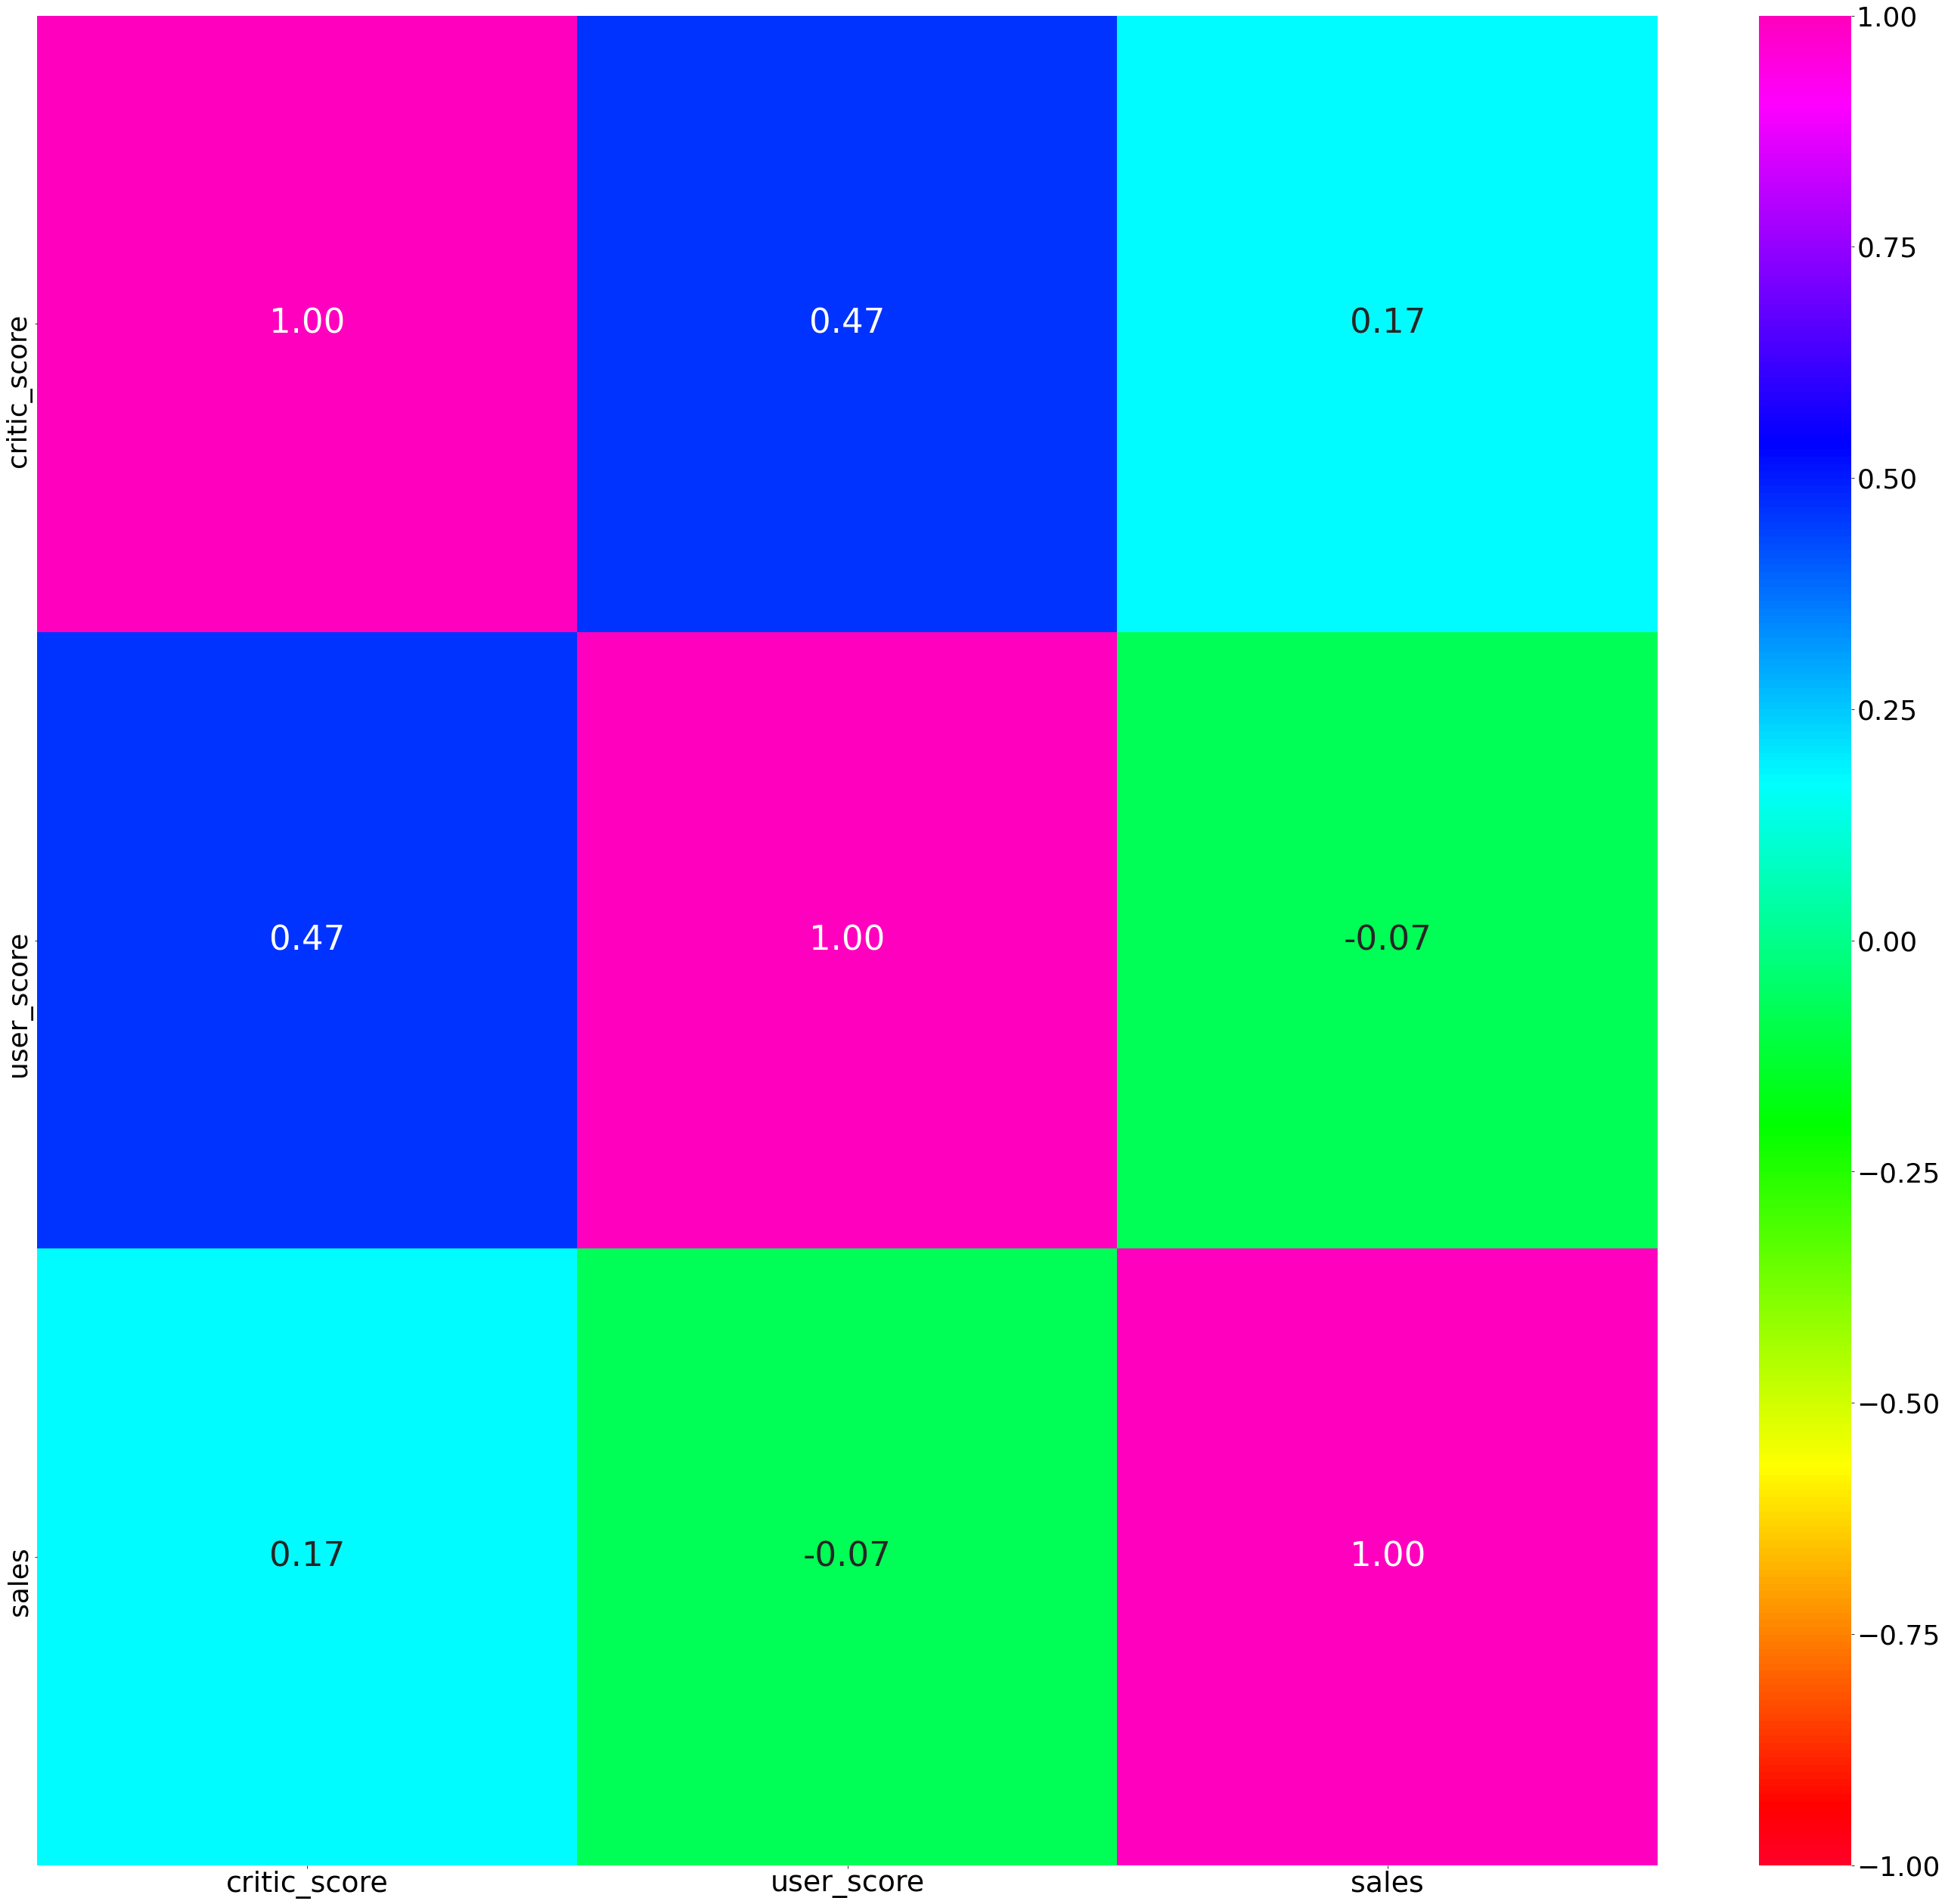

In [47]:
#оценка корреляций между продажами и оценками пользователей для платформы PС
pc=games.loc[games['platform']== 'PC', ['name', 'platform', 'critic_score', 'user_score', 'sales']]
cor_pc = pc.corr()
#вывод тепловой карты
plt.figure(figsize=(48,45))
with plt.style.context({'axes.labelsize':24,
                        'xtick.labelsize':38,
                        'ytick.labelsize':36}):
    sns.heatmap(data=cor_pc, 
            annot=True,
            fmt=".2f", 
            vmin=-1, 
            vmax=1, 
            cmap="gist_rainbow",
            annot_kws={'size': 45})

plt.show()

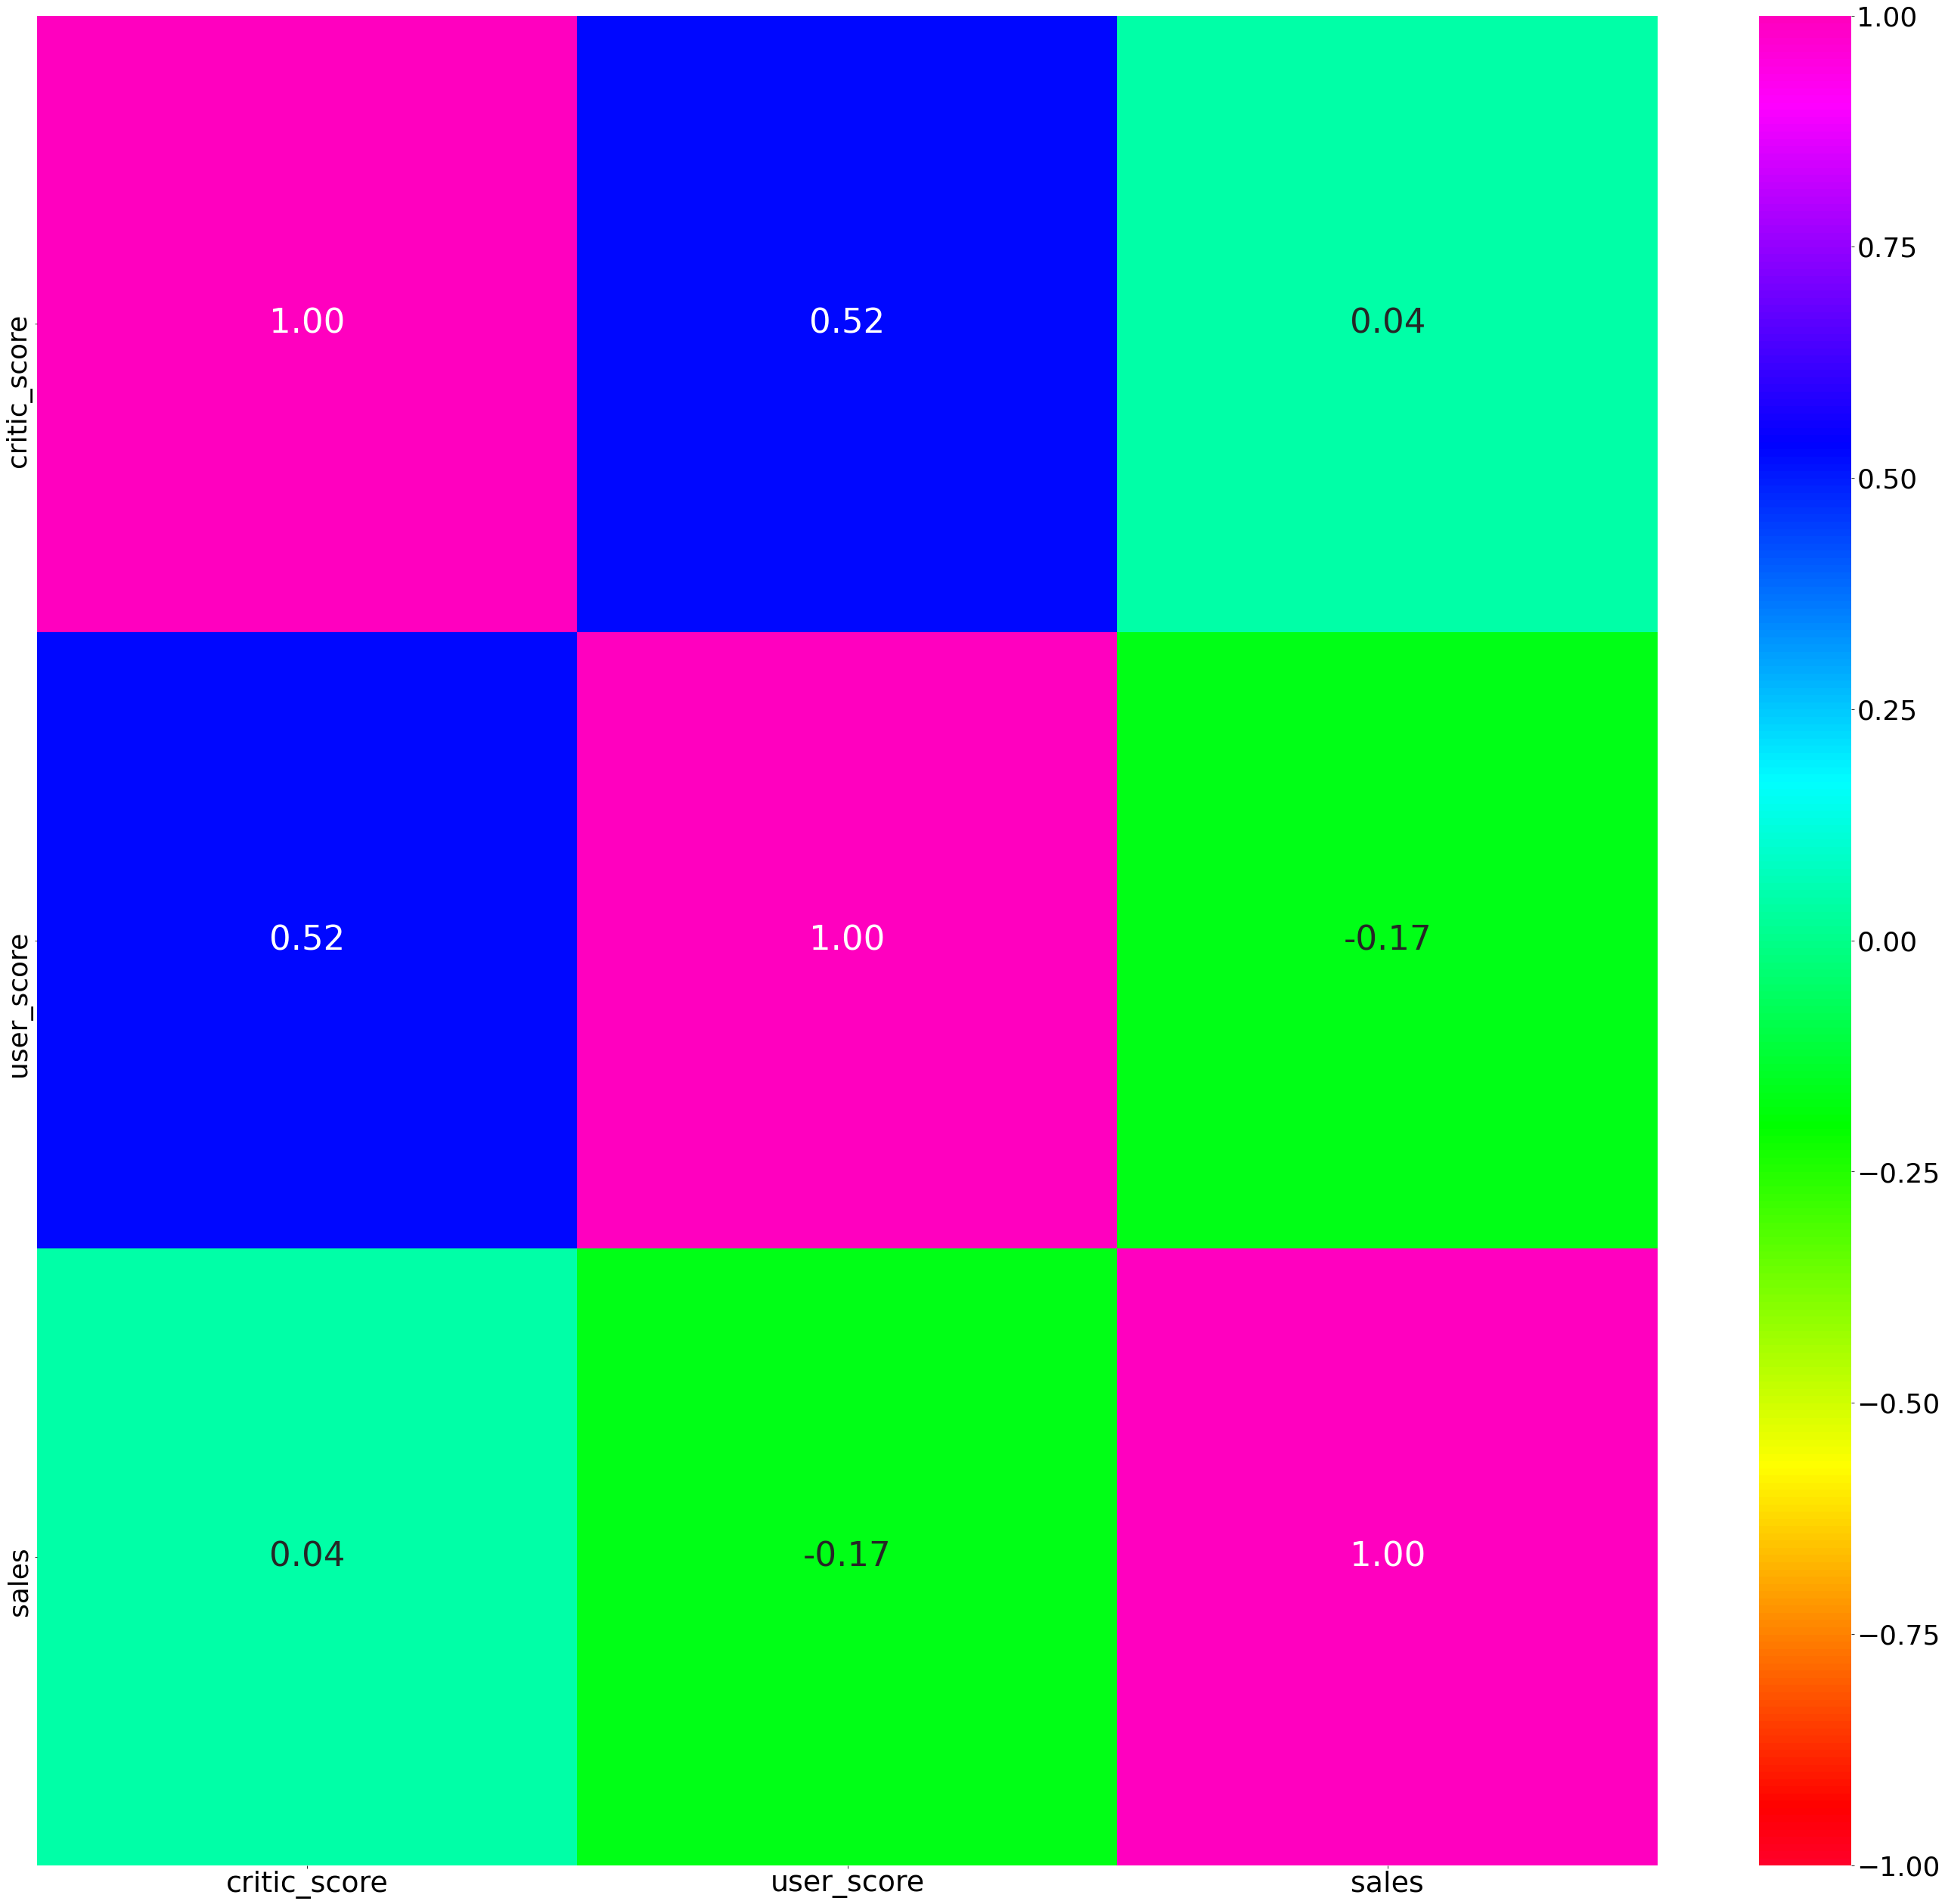

In [48]:
#оценка корреляций между продажами и оценками пользователей для платформы PSV
psv=games.loc[games['platform']== 'PSV', ['name', 'platform', 'critic_score', 'user_score', 'sales']]
cor_psv = psv.corr()
#вывод тепловой карты
plt.figure(figsize=(48,45))
with plt.style.context({'axes.labelsize':24,
                        'xtick.labelsize':38,
                        'ytick.labelsize':36}):
    sns.heatmap(data=cor_psv, 
            annot=True,
            fmt=".2f", 
            vmin=-1, 
            vmax=1, 
            cmap="gist_rainbow",
            annot_kws={'size': 45})

plt.show()

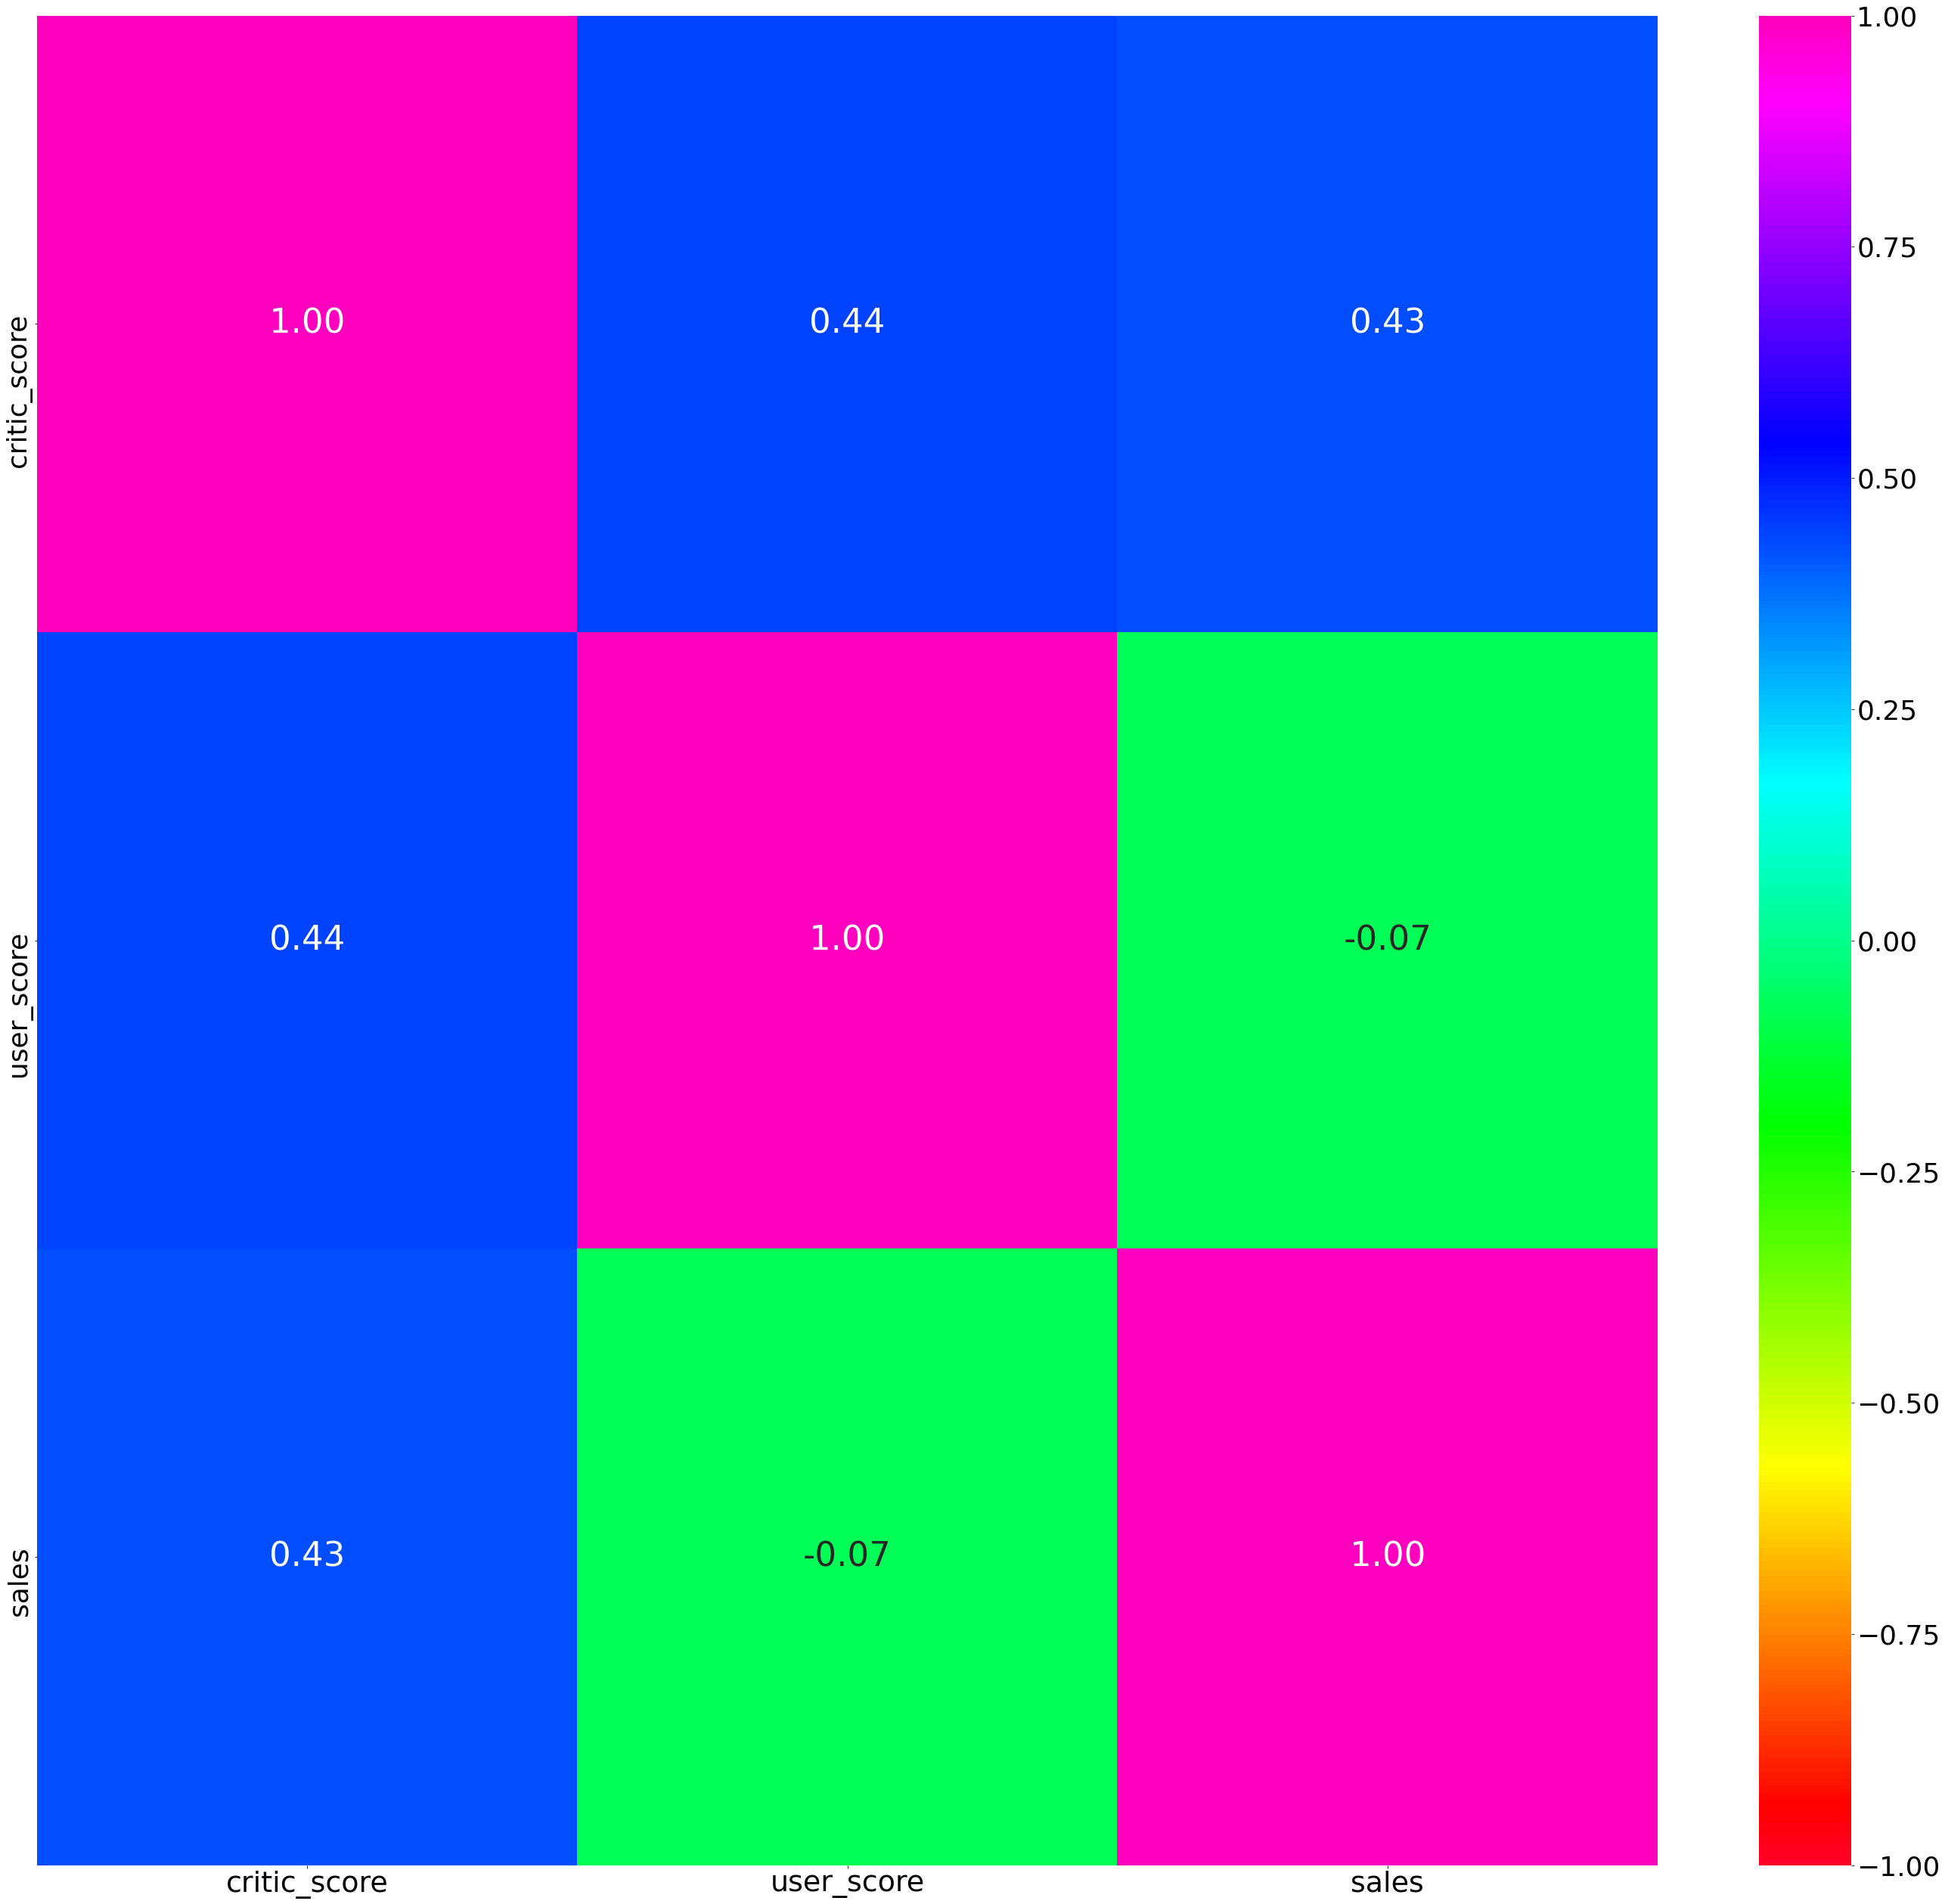

In [49]:
#оценка корреляций между продажами и оценками пользователей для платформы XOne
x=games.loc[games['platform']== 'XOne', ['name', 'platform', 'critic_score', 'user_score', 'sales']]
cor_x = x.corr()
#вывод тепловой карты
plt.figure(figsize=(48,45))
with plt.style.context({'axes.labelsize':24,
                        'xtick.labelsize':38,
                        'ytick.labelsize':36}):
    sns.heatmap(data=cor_x, 
            annot=True,
            fmt=".2f", 
            vmin=-1, 
            vmax=1, 
            cmap="gist_rainbow",
            annot_kws={'size': 45})

plt.show()

Вывод о том, что оценки пользователей минимально влияют на объемы продаж, подтвердился и в ходе анализа корреляций для иных платформ. Оценки критиков чаще всего влияют средне (коэффициенты корреляции между продажами и оценками критиков варьируются от 0.3 до 0.42), но для платформы PSV оценки критиков на продажи практически не влияют, что возможно связано с низкой популярностью консоли, из-за чего меньшее число критиков могли обратить внимание на релизы игр на нее.

#### Оценка влияния жанра на продажи игры

Оценим, как на продажи влияет жанр игры. 

In [50]:
#сводная таблица с показатели, характеризующими продажи игр разных жанров
genre_table=games.pivot_table(index='genre', values='sales', aggfunc = ['sum', 'count', 'median', 'mean'])
display(genre_table)

,sum,count,median,mean
,sales,sales,sales,sales
genre,,,,
Action,199.36,619,0.090,0.322068
Adventure,17.55,185,0.030,0.094865
Fighting,28.22,60,0.125,0.470333
Misc,37.55,113,0.090,0.332301
Platform,18.09,38,0.140,0.476053
Puzzle,2.21,14,0.045,0.157857
Racing,27.52,69,0.090,0.398841
Role-Playing,101.44,221,0.110,0.459005


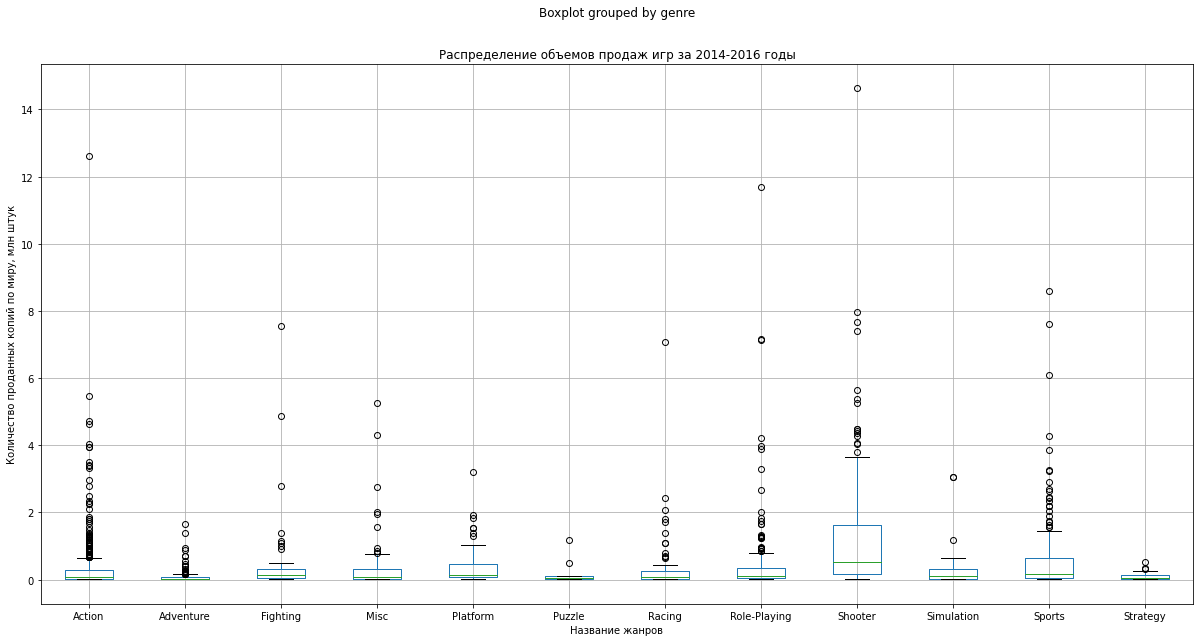

In [51]:
#оценка продаж по всем жанрам за 2014-2016 годы в форме графика с усами
games.boxplot(column='sales', by='genre', figsize=(20,10))
plt.xlabel('Название жанров')
plt.ylabel('Количество проданных копий по миру, млн штук')
plt.title('Распределение объемов продаж игр за 2014-2016 годы')
plt.show()

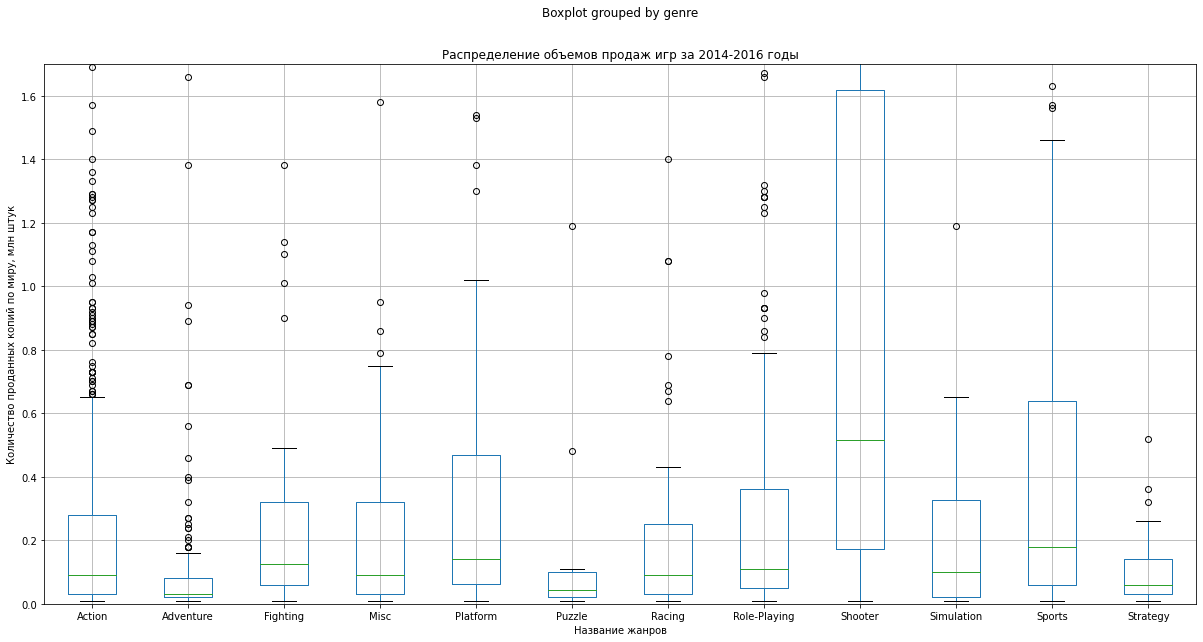

In [52]:
#оценка продаж по всем жанрам за 2014-2016 годы в форме графика с усами более детально
games.boxplot(column='sales', by='genre', figsize=(20,10))
plt.xlabel('Название жанров')
plt.ylabel('Количество проданных копий по миру, млн штук')
plt.title('Распределение объемов продаж игр за 2014-2016 годы')
plt.ylim(0, 1.7)
plt.show()

Шутеры являются наиболее продаваемыми играми - несмотря на меньшую долю на рынке, их покупают чаще(средние продажи шутера - 1.33 миллиона копий, медианные - 0.515 миллионов).
Достаточно популярны у пользователей игры спортивного жанра, связанные с битвами - медианные продажи по данным жанрам составили 0.180 и 0.125 миллиона соответственно. Хорошо продаются игры жанра platform - медианные продажи 0.140 миллиона.
Следующими по рейтингу выделяются симуляторы, гонки и боевики. Боевики занимают наибольшую долю рынка, но при этом по медианным продажам проигрывают ряду жанров, возможно, из-за высокой конкуренции.
Бестселлерами стали игры жанра шутер, боевик, ролевая игра, спортивные игры.
Наименьшим спросом у пользователей пользуются игры в жанре стратегии, загадки и приключения.

<div class="alert alert-dang er">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />        
Стоит проанализировать прибыльность жанров на диаграмме размаха, сравнить медианные продажи на каждом жанре и проверить какая из них более стабильна и имеет более длинный ряд успешно продающихся игр
        
График нарисовать __в двух масштабах с выбросами и без__ (чтобы было видно 0.75-квантиль)

### Портрет типичного пользователя

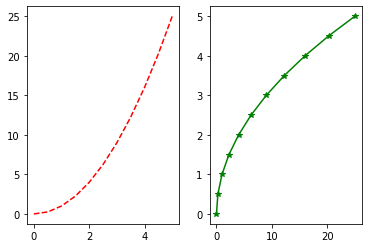

In [53]:
# check

# пример из ссылки

# данные для линий

x = np.linspace(0, 5, 11)
y = x**2

# строим графики

plt.subplot(1, 2, 1)
plt.plot(x, y, 'r--')  #  Магия
plt.subplot(1, 2, 2)
plt.plot(y, x, 'g*-');

Составим портрет типичного пользователя игровых устройств в разных регионах. Используем данные по последним годам для получения наиболее актуальной картины. Определим, какими плафтормами чаще пользуется житель региона, какие жанры выбирает и использует ли рейтинг игры для этого.
При формировании рейтинга все платформы/жанры, которые не вошли в топ-5 самых популярных, заменим на "Other" для более точной картины

#### Портрет типичного пользователя из Северной Америки

In [54]:
#Пользователь из Северной Америки - топ-5 платформ
#формирование топа самых популярных платформ в Северной Америке
na_p = games.loc[:, ['platform', 'na_sales']]
top_5_na_p=na_p.groupby(['platform']).agg(na_p_sales = ('na_sales', 'sum')).sort_values(by = 'na_p_sales', ascending=False)[:5] 

In [55]:
#ввод понятия "Other" для платформ вне топ-5
na_p['platform'] = na_p['platform'].where(na_p['platform'].isin(top_5_na_p.index), 'Other')
p_na=na_p.groupby(['platform']).agg(na_p_sales = ('na_sales', 'sum')).sort_values(by = 'na_p_sales', ascending=False)
p_na

,na_p_sales
platform,
PS4,98.61
XOne,81.27
Other,31.19
X360,28.30
3DS,22.64
PS3,22.05


In [56]:
#Пользователь из Северной Америки - топ-5 жанров
#формирование топа самых популярных жанров в Америке
na_g = games.loc[:, ['genre', 'na_sales']]
top_5_na_g=na_g.groupby(['genre']).agg(na_g_sales = ('na_sales', 'sum')).sort_values(by = 'na_g_sales', ascending=False)[:5] 
#ввод понятия "Other" для платформ вне топ-5
na_g['genre'] = na_g['genre'].where(na_g['genre'].isin(top_5_na_g.index), 'Other')
g_na=na_g.groupby(['genre']).agg(na_g_sales = ('na_sales', 'sum')).sort_values(by = 'na_g_sales', ascending=False)
g_na #вывод итогового рейтинга

,na_g_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Other,37.86
Role-Playing,33.47
Misc,15.05


In [57]:
#Пользователь из Северной Америки - интерес к играм с разными возрастными рейтингами
games_na_r = games.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
games_na_r

,na_sales
rating,
M,96.42
NS,64.72
E,50.74
T,38.95
E10+,33.23


Пользователи из Северной Америки предпочитают Sony Play Station. В жанрах американцы предпочтиают боевики и шутеры, а также игры на тему спорта.
На компьютерах данные пользователи практически не играют, выбирая консоли для этих целей.
При выборе игры покупатели из Северной Америки учитывают рейтинг игры - игры, ожидающие оценивания или игры без оценки, в этом регионе приобретаются реже (Это связано также с тем, что для доступа на американский рынок все игры должны иметь оценку  ESRB, возможно, пользователи из Америки приобретали игры без оценки через иные каналы сбыта), наибольший интерес вызывают игры для взрослой возрастной аудитории (М) - этим рейтингом обычно и оценивают популярные шутеры и боевики. 


#### Портрет типичного пользователя из Европы

In [58]:
#Пользователь из Европы - топ-5 популярных платформ
#формирование топа самых популярных платформ в Европе
eu_p = games.loc[:, ['platform', 'eu_sales']]
top_5_eu_p=eu_p.groupby(['platform']).agg(eu_p_sales = ('eu_sales', 'sum')).sort_values(by = 'eu_p_sales', ascending=False)[:5] 
#ввод понятия "Other" для платформ вне топ-5
eu_p['platform'] = eu_p['platform'].where(eu_p['platform'].isin(top_5_eu_p.index), 'Other')
p_eu=eu_p.groupby(['platform']).agg(eu_p_sales = ('eu_sales', 'sum')).sort_values(by = 'eu_p_sales', ascending=False)
p_eu #вывод итогового рейтинга

,eu_p_sales
platform,
PS4,130.04
XOne,46.25
Other,34.76
PS3,25.54
PC,17.97
3DS,16.12


In [59]:
#Пользователь из Европы - топ-5 популярных жанров
#формирование топа самых популярных жанров в Европе
eu_g = games.loc[:, ['genre', 'eu_sales']]
top_5_eu_g=eu_g.groupby(['genre']).agg(eu_g_sales = ('eu_sales', 'sum')).sort_values(by = 'eu_g_sales', ascending=False)[:5] 
#ввод понятия "Other" для платформ вне топ-5
eu_g['genre'] = eu_g['genre'].where(eu_g['genre'].isin(top_5_eu_g.index), 'Other')
g_eu=eu_g.groupby(['genre']).agg(eu_g_sales = ('eu_sales', 'sum')).sort_values(by = 'eu_g_sales', ascending=False)
g_eu #вывод итогового рейтинга

,eu_g_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Other,42.45
Role-Playing,28.17
Racing,14.13


In [60]:
#Пользователь из Европы и его интерес к играм с разным возрастным цензом
games_eu_r = games.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
games_eu_r

,eu_sales
rating,
M,93.44
NS,58.95
E,58.06
T,34.07
E10+,26.16


Житель Европы предпочитает PS4, приличные объемы продаж игр и для предыдущей модели линейки - PS3. Игры на компьютеры вошли в топ-5 продаж. Можно сделать вывод, что жители Европы больше любят играть дома или в иных местах со стационарными устройствами, так как игры на портативные консоли продаются реже, чем в Америке.
Жанры, любимые европейцами, во многом совпадают с любимыми жанрами американцев - в топе так же боевики, шутеры и спортивные игры, ролевые игры и игры на музыкальные темы.
Европейцы реже обращают внимание на рейтинг американской организации  ESRB, второе место по объемам продаж занимают игры, рейтинг которых не был определен.


#### Портрет типичного пользователя из Японии

In [61]:
#Пользователь из Японии - топ-5 популярных платформ
#формирование топа самых популярных платформ в Японии
jp_p = games.loc[:, ['platform', 'jp_sales']]
top_5_jp_p=jp_p.groupby(['platform']).agg(jp_p_sales = ('jp_sales', 'sum')).sort_values(by = 'jp_p_sales', ascending=False)[:5] 
#ввод понятия "Other" для платформ вне топ-5
jp_p['platform'] = jp_p['platform'].where(jp_p['platform'].isin(top_5_jp_p.index), 'Other')
p_jp=jp_p.groupby(['platform']).agg(jp_p_sales = ('jp_sales', 'sum')).sort_values(by = 'jp_p_sales', ascending=False)
p_jp #вывод итогового рейтинга

,jp_p_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31
Other,0.76


In [62]:
#Пользователь из Японии - топ-5 популярных жанров
#формирование топа самых популярных жанров в Японии
jp_g = games.loc[:, ['genre', 'jp_sales']]
top_5_jp_g=jp_g.groupby(['genre']).agg(jp_g_sales = ('jp_sales', 'sum')).sort_values(by = 'jp_g_sales', ascending=False)[:5] 
#ввод понятия "Other" для платформ вне топ-5
jp_g['genre'] = jp_g['genre'].where(jp_g['genre'].isin(top_5_jp_g.index), 'Other')
g_jp=jp_g.groupby(['genre']).agg(jp_g_sales = ('jp_sales', 'sum')).sort_values(by = 'jp_g_sales', ascending=False)
g_jp #вывод итогового рейтинга

,jp_g_sales
genre,
Role-Playing,31.16
Action,29.58
Other,15.50
Fighting,6.37
Misc,5.61
Shooter,4.87


In [63]:
#Пользователь из Японии и его интерес к играм с разным возрастным цензом
games_jp_r = games.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
games_jp_r

,jp_sales
rating,
NS,56.90
T,14.78
E,8.94
M,8.01
E10+,4.46


Пользователи из Японии предпочитают маленькие консоли, также популярна PS4. Среди популярных жанров отмечаются расхождения с популярными жанрами у европейцев и американцев - японские пользователи предпочитают сюжетные ролевые игры, не любят шутеры, интересуются платформенными играми. При этом, боевики, спортивные и музыкальные игры в регионе неплохо продаются.
Рейтинг американской ассоциации японцев практически не игтересует - лучше всего продаются игры, которые ассоциацией не были оценены. Возможно это связано с тем, что в Японии функционирует другая организация, оценивающая игры, поэтому американский рейтинг для пользователей из Японии не актуален
Уровень продаж игр для взрослой аудитории значительно ниже уровня продаж игр такого рейтинга в иных регионах.

#### Сравнительные выводы по всем регионам

Представим итоговую статистику по топ-5 платформам и жанрам по всем трем регионам в форме графиков.

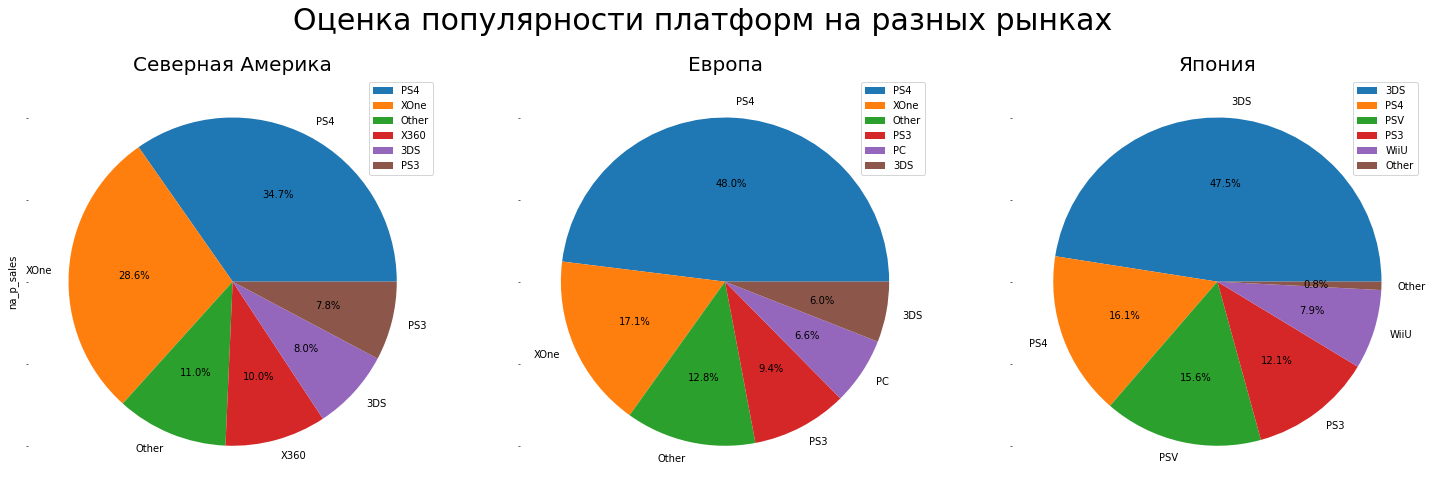

In [64]:
#оценка популярных платформ
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(25,8))
p_na.plot(y='na_p_sales', kind='pie', autopct='%1.1f%%', ax=ax[0])
p_eu.plot(y='eu_p_sales', kind='pie', autopct='%1.1f%%', ax=ax[1])
p_jp.plot(y='jp_p_sales', kind='pie', autopct='%1.1f%%', ax=ax[2])
ax[0].set_title("Северная Америка", fontsize=20)
ax[1].set_title("Европа", fontsize=20)
ax[2].set_title("Япония", fontsize=20)
fig.suptitle('Оценка популярности платформ на разных рынках', fontsize=30)

plt.show()

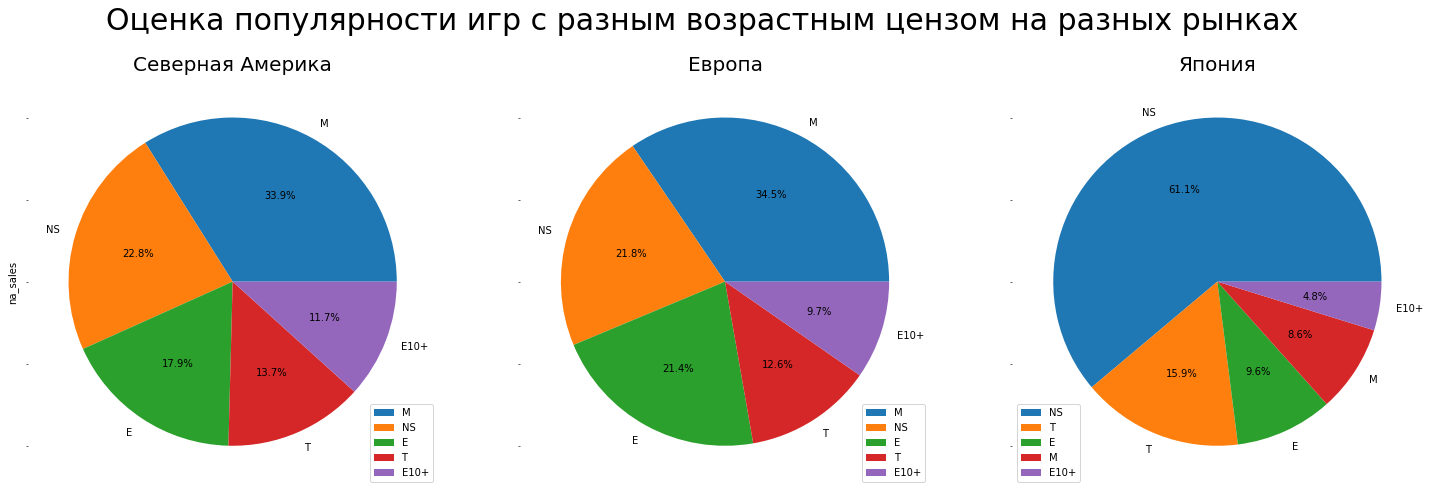

In [65]:
#оценка популярных жанров
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(25,8))
games_na_r.plot(y='na_sales', kind='pie', autopct='%1.1f%%', ax=ax[0])
games_eu_r.plot(y='eu_sales', kind='pie', autopct='%1.1f%%', ax=ax[1])
games_jp_r.plot(y='jp_sales', kind='pie', autopct='%1.1f%%', ax=ax[2])
ax[0].set_title("Северная Америка", fontsize=20)
ax[1].set_title("Европа", fontsize=20)
ax[2].set_title("Япония", fontsize=20)
fig.suptitle('Оценка популярности игр с разным возрастным цензом на разных рынках', fontsize=30)
plt.show()

### Проверка гипотез 

#### Гипотеза 1
Проверим, отличаются ли пользовательские рейтинги для игр на Xbox One и PC.
***Нулевая гипотеза*** - Средние пользовательские рейтинги игр для платформ не отличаются
***Альтернативная гипотеза*** - Средние пользовательские рейтинги для платформ отличаются.

Для получения наиболее точной оценки не будем рассматривать данные, в которых отсутствуют сведения о пользовательской оценке. Так как платформа XOne существует с 2013 года, то для анализа возьмем актуальные данные, сдержащие в себе сведения об играх, выпущенных в 2014-2016 годах, когда обе платформы уже работали.
Уровень значимости альфа примем равным 0.05(5%)
Так как ожидаемые выборки будут независимы и необходимо провести сравнение их средних, воспользуемся методом scipy.stats.ttest_ind()
При проверке используем p-value - наименьшее значение уровня значимости, при котором полученная проверочная статистика ведет к отказу от основной (нулевой) гипотезы, то есть, вероятность того, что нулевая гипотеза ложна.

In [66]:
xone=games.query('platform == "XOne" and user_score.isna() == False') #срез с данными об играх для XOne для проверки гипотезы
pc=games.query('platform == "PC" and user_score.isna() == False') #срез с данными об играх для PC для проверки гипотезы

print(xone['user_score'].var()) #оценка дисперсии для данных об оценках пользователей на игры на XOne

1.8910066518847013


<div class="alert alert-da nger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Стоит выравнивать периоды использования платформ, одна из приставок вышла на рынок совсем недавно ...

In [67]:
print(pc['user_score'].var())#оценка дисперсии для данных об оценках пользователей на игры на PC

2.901154315133451


Дисперсии не равны, при проверке зададим equal_var = False

In [68]:
results = st.ttest_ind(xone['user_score'], pc['user_score'],  equal_var = False) 
alpha = 0.05
print('pvalue', results.pvalue)
if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу ')

pvalue 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу 


Таким образом, пользовательские рейтинги для для игр на Xbox One и PC не отличаются

In [82]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


#### Гипотеза 2
Проверим, отличаются ли пользовательские рейтинги для игр жанра боевик(экшн игры) и спорт.
***Нулевая гипотеза*** - Средние пользовательские рейтинги игр жанров экшн и спорт не отличаются
***Альтернативная гипотеза*** - Средние пользовательские рейтинги для платформ отличаются.

Для получения наиболее точной оценки не будем рассматривать данные, в которых отсутствуют сведения о пользовательской оценке.
Уровень значимости альфа примем равным 0.05(5%)
Так как ожидаемые выборки будут независимы и необходимо провести сравнение их средних, воспользуемся методом scipy.stats.ttest_ind()

In [69]:
action=games.query('genre == "Action" and user_score.isna() == False') #срез с данными об играх Action для проверки гипотезы
sports=games.query('genre == "Sports" and user_score.isna() == False') #срез с данными об играх для Sports для проверки гипотезы

In [70]:
#оценка дисперсии для данных об оценках пользователей на игры жанра Action
print(action['user_score'].var())

1.8984766584766581


In [71]:
#оценка дисперсии для данных об оценках пользователей на игры жанра Sports
print(sports['user_score'].var())

3.446979127609048


Дисперсии не равны, при проверке зададим equal_var = False

In [72]:
results = st.ttest_ind(action['user_score'], sports['user_score'],  equal_var = False) 
alpha = 0.05
print('pvalue', results.pvalue)
if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу ')

pvalue 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Так как pvalue меньше принятого уровня значимости, то нулевую гипотезу следует отвергнуть. Можно сделать вывод, что оценки пользователей для игр данных жанров различаются

### Выводы

Был проанализирован набор исторических данных о видеоиграх, выпущенных с 1984 по 2016 год, включая сведения о наименовании игры, ее жанре, годе релиза, объемах продаж по Северной Америке, Европе, Японии и иным странам, оценкам игры со стороны критиков и пользователей, а также возрастном цензе игры по версии американской ассоциации  ESRB.
Было отмечено, что ряд данных были пропущены. Причинами в пропусках в наименовании игры, ее жанре и дате релиза можно считать ошибки при составлении датасета. Значения, связанные с рейтингом игры, могли быть пропущены из-за того, что игра была выпущена ранее года старта работы  ESRB или официально не издавалась в Америке, из-за чего осталась вне поля видения рецензентов.
Пропуски в оценках критиков могли быть связаны с низкой популярностью игры, как и пропуски в оценках пользователей. Также пользователи часто не оставляют отзывы на игры, из-за чего сформировать оценку не представлялось возможным.

По итогам оценки данных и изучения предметной области было принято решение оставить для изучения данные за последние 3 года, так как игры, выпущенные ранее, уже не пользуются большим спросом у потребителей и скорее всего заменены аналогами, новыми релизами на более современные платформы (срок жизни которых в среднем составляет 8-10 лет).
Так как платформы постоянно обновляются(кроме персональных компьютеров, интерес к играм на которые достаточно стабилен), то были отобраны наиболее интересные и актуальные платформы (РС, PS4, XOne, PSV, 3DC) и изучены продажи и релизы игр на них. 
Было отмечено, что PS4 достаточно ярко выглядит на рынке. На PSV выпускается достаточно приличное число игр, но по общей сумме продаж платформа проигрывает. XOne можно считать второй фокусной линейкой после PSP. РС - не очень популярная платформа, но самая стабильная, в отличие от иных платформ, представленных в рейтинге. 3DS сейчас падает в популярности и через 2-3 года игры на нее можно выводить из ассортимента, но пока продажи игр на нее остаются на нормальном уровне, возможно рассмотрение в качестве резервного варианта.

На продажи игр для отобранных платформ оценка пользователей влияет минимально, оценка критиков влияет средне, поэтому оценку пользователей можно не учитывать при формировании ассортимента магазина. На оценку критиков можно обратить внимание в рекламной кампании, так как часто оценки пользователей и критиков взаимосвязаны.

Был также сформирован портрет типичного пользователя из разных регионов:
- пользователи из Северной Америки предпочитают портативные устройства, но самым популярным оказалась стационарная платформа PS4. Любимые жанры - боевики(или экшн), шутеры, спортивные игры, музыкальные игры. Для данной группы пользователей важен рейтинг ESRB, при подборе рекомендаций для разной возрастной аудитории его следует учесть;
- пользователи из Европы больше любят играть на стационарных устройствах - Play Station 4 серии, портативные устройства пользуются значительно меньшим спросом. Любимые жанры совпадают с любимыми жанрами пользователей из Северной Америки. Внимание к рейтингу ESRB данная группа пользователей уделяет поменьше, возможно, они учитывают рейтинг PEGI. Следует провести дополнительное исследование для изучения данного вопроса;
- пользователи из Японии предпочитают маленькие консоли, также популярна PS4. Среди популярных жанров отмечаются расхождения с популярными жанрами у европейцев и американцев - японские пользователи предпочитают сюжетные ролевые игры, не любят шутеры, интересуются платформенными играми. При этом, боевики, спортивные и музыкальные игры в регионе также пользуются спросом. На рейтинг ESRB японцы не обращают внимание, возможно, они учитывают при подборе игр оценку CERO. Следует провести дополнительное исследование для изучения данного вопроса.

Также в ходе исследования было получено, что средние пользовательские оценки игр, выпущенных для Xbox One и PC, практически не отличаются. Возможно, это объясняется тем, что некоторые игры выпускаются для ряда платформ без изменения сюжета и аналоги соответственно получают схожие оценки.
При этом, средние оценки пользователей для игр разных жанров, а именно жанра экшн и спорт, отличаются между собой.